In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/final-alpha-model-data.csv")

In [7]:
df

,timestamp,close,high,low,open,volume,log_returns,min_10k_count,min_100_count,new_non_zero_count,...,sopr,loss_sum,liveliness,nvt,nvts,reserve_risk,rhodl_ratio,stock_to_flow_deflection,utxo_created_count,velocity
0,2020-01-01 17:00:00,7233.80,7248.00,7221.88,7241.91,2477.807,-0.001120,109,16209,20313,...,0.999051,7.523547e+06,0.607797,819.771295,716.378862,0.000041,611.396889,0.884971,38237,0.001220
1,2020-01-01 18:00:00,7237.47,7241.95,7222.00,7233.87,1827.668,0.000507,109,16215,14181,...,0.999407,7.586606e+06,0.607789,1154.776475,715.356827,0.000041,608.884855,0.883311,25450,0.000866
2,2020-01-01 19:00:00,7226.35,7237.83,7223.15,7237.83,1028.577,-0.001538,109,16217,13904,...,0.990449,7.579957e+06,0.607772,1287.454092,715.704908,0.000041,609.037200,0.883312,26933,0.000777
3,2020-01-01 20:00:00,7233.30,7242.00,7223.09,7226.56,1476.534,0.000961,109,16216,12454,...,0.998999,7.553311e+06,0.607765,1556.820359,716.438407,0.000041,609.027076,0.884052,26166,0.000642
4,2020-01-01 21:00:00,7229.71,7238.79,7225.00,7233.32,1210.884,-0.000496,109,16217,15011,...,0.999485,7.560363e+06,0.607757,978.046894,716.527949,0.000041,609.021778,0.883647,28188,0.001022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2023-01-01 11:00:00,16549.80,16549.80,16535.10,16542.90,3768.388,0.000423,114,16137,10550,...,0.998886,1.007863e+07,0.608496,1660.039727,520.966047,0.000018,238.290788,0.148871,24824,0.000602
26299,2023-01-01 12:00:00,16553.90,16565.90,16542.90,16549.80,5482.001,0.000248,114,16137,12154,...,0.997684,9.967149e+06,0.608488,1893.553590,521.893407,0.000018,238.610267,0.148974,26929,0.000528
26300,2023-01-01 13:00:00,16539.90,16559.80,16530.50,16553.80,4505.256,-0.000846,114,16139,13068,...,0.991923,1.011094e+07,0.608484,2258.483026,522.312532,0.000018,238.741910,0.148826,28478,0.000443
26301,2023-01-01 14:00:00,16533.10,16549.70,16533.10,16539.90,2448.444,-0.000411,114,16138,11067,...,0.997917,1.004298e+07,0.608478,2292.201965,523.310984,0.000018,238.716435,0.148881,21781,0.000436


In [8]:
df.columns

Index(['timestamp', 'close', 'high', 'low', 'open', 'volume', 'log_returns',
       'min_10k_count', 'min_100_count', 'new_non_zero_count', 'count',
       'active_more_1y_percent', 'block_count', 'hash_rate_mean',
       'inflation_rate', 'revenue_from_fees', 'balance_exchanges',
       'transfers_volume_to_exchanges_sum', 'net_realized_profit_loss',
       'net_unrealized_profit_loss', 'realized_loss', 'realized_profit',
       'sopr', 'loss_sum', 'liveliness', 'nvt', 'nvts', 'reserve_risk',
       'rhodl_ratio', 'stock_to_flow_deflection', 'utxo_created_count',
       'velocity'],
      dtype='object')

In [12]:
df = df.tail(5000)

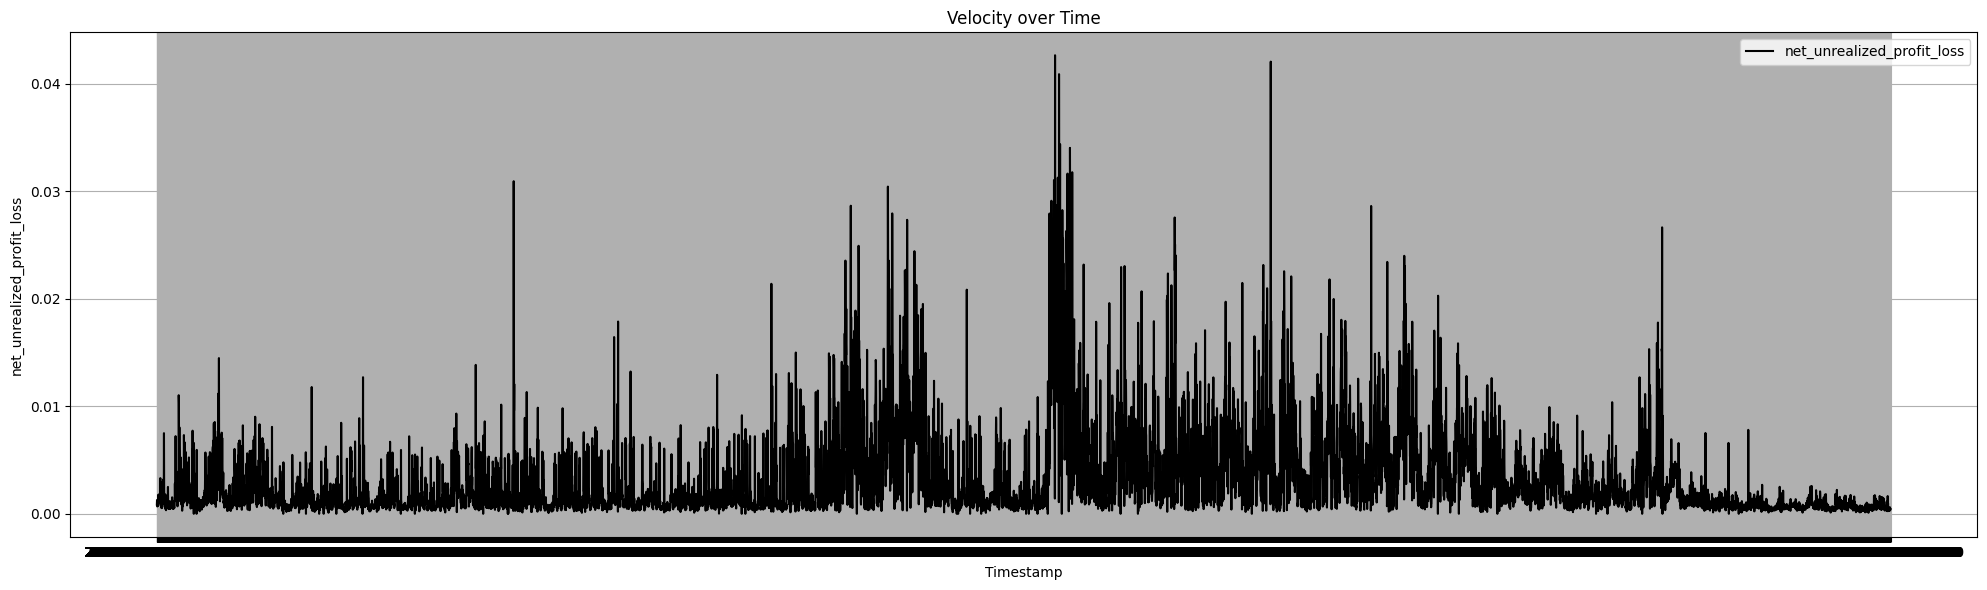

In [11]:
plt.figure(figsize=(20, 6))
plt.plot(df['timestamp'], df["velocity"], label=feature, color='black')
plt.title('Velocity over Time')
plt.xlabel('Timestamp')
plt.ylabel(feature)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

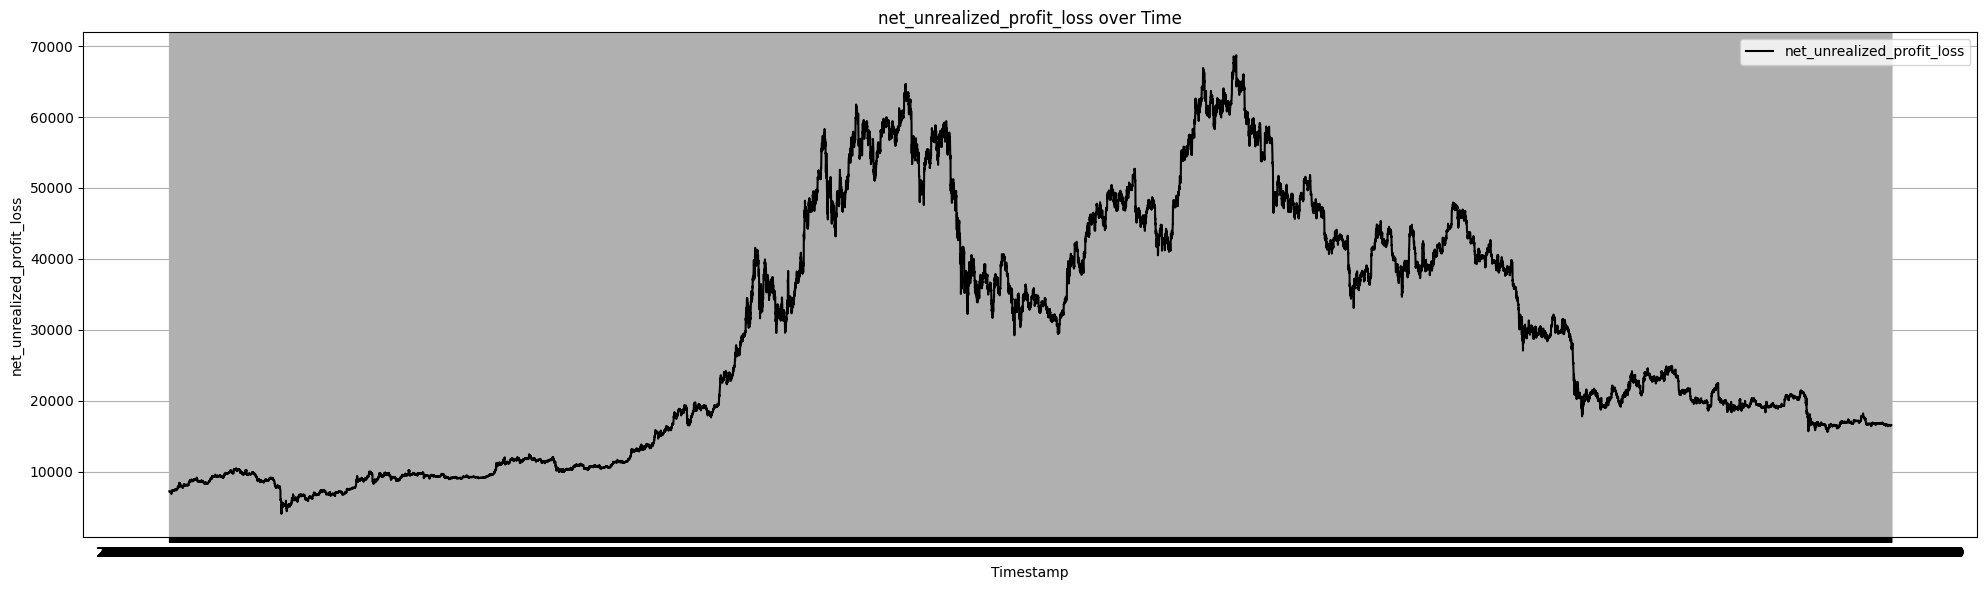

In [6]:
plt.figure(figsize=(20, 6))
plt.plot(df['timestamp'], df["close"], label=feature, color='black')
plt.title(f'{feature} over Time')
plt.xlabel('Timestamp')
plt.ylabel(feature)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

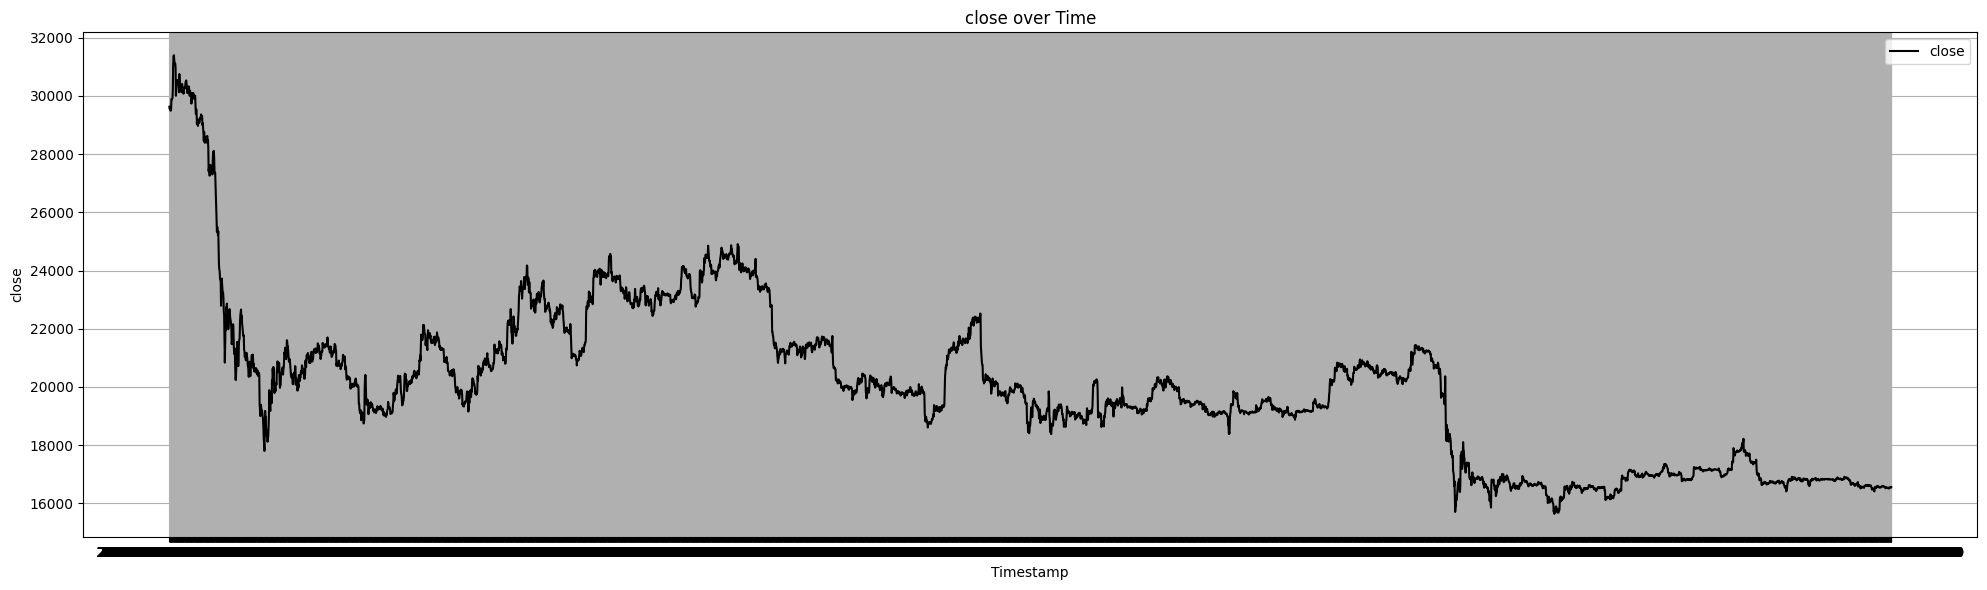

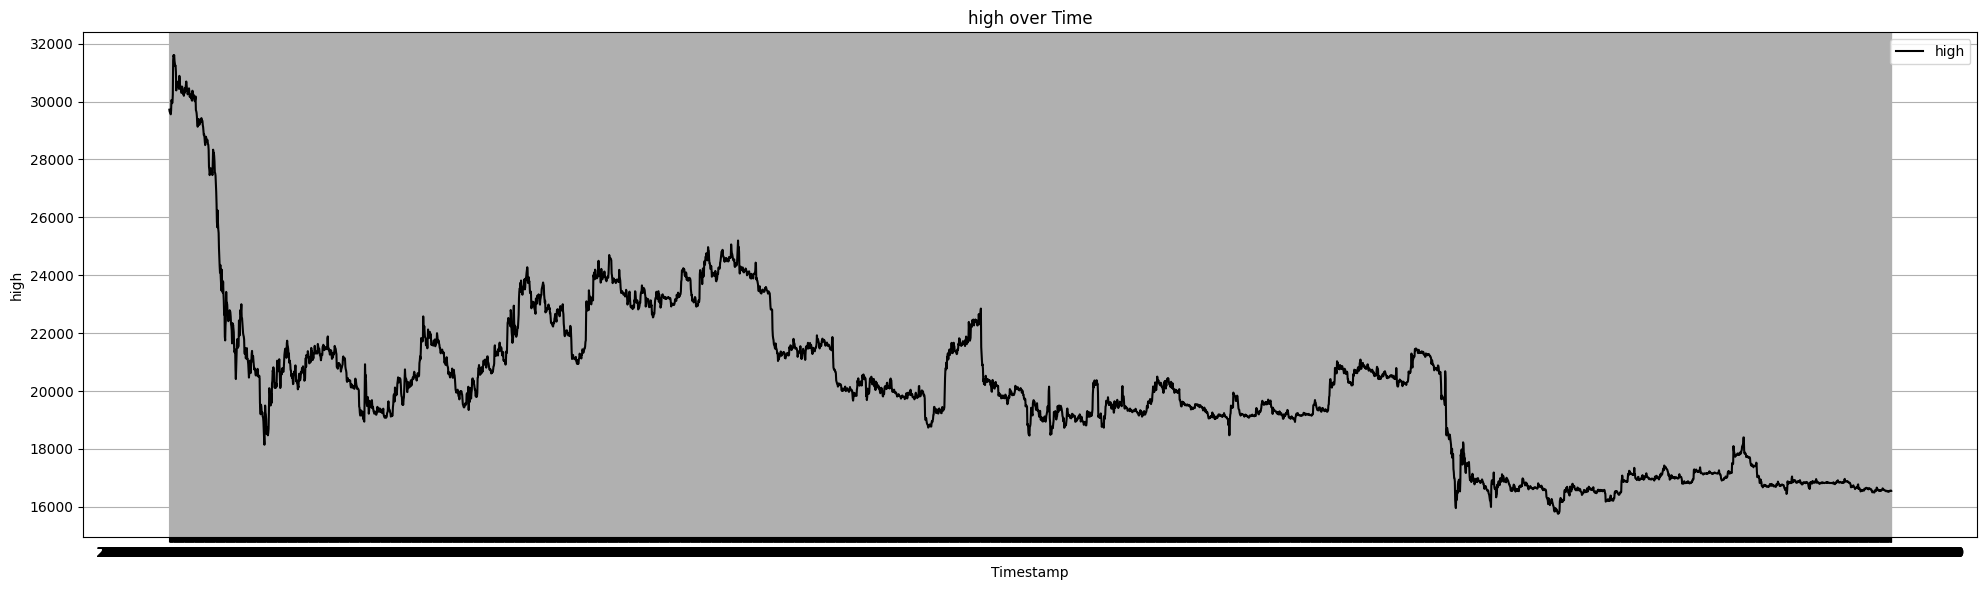

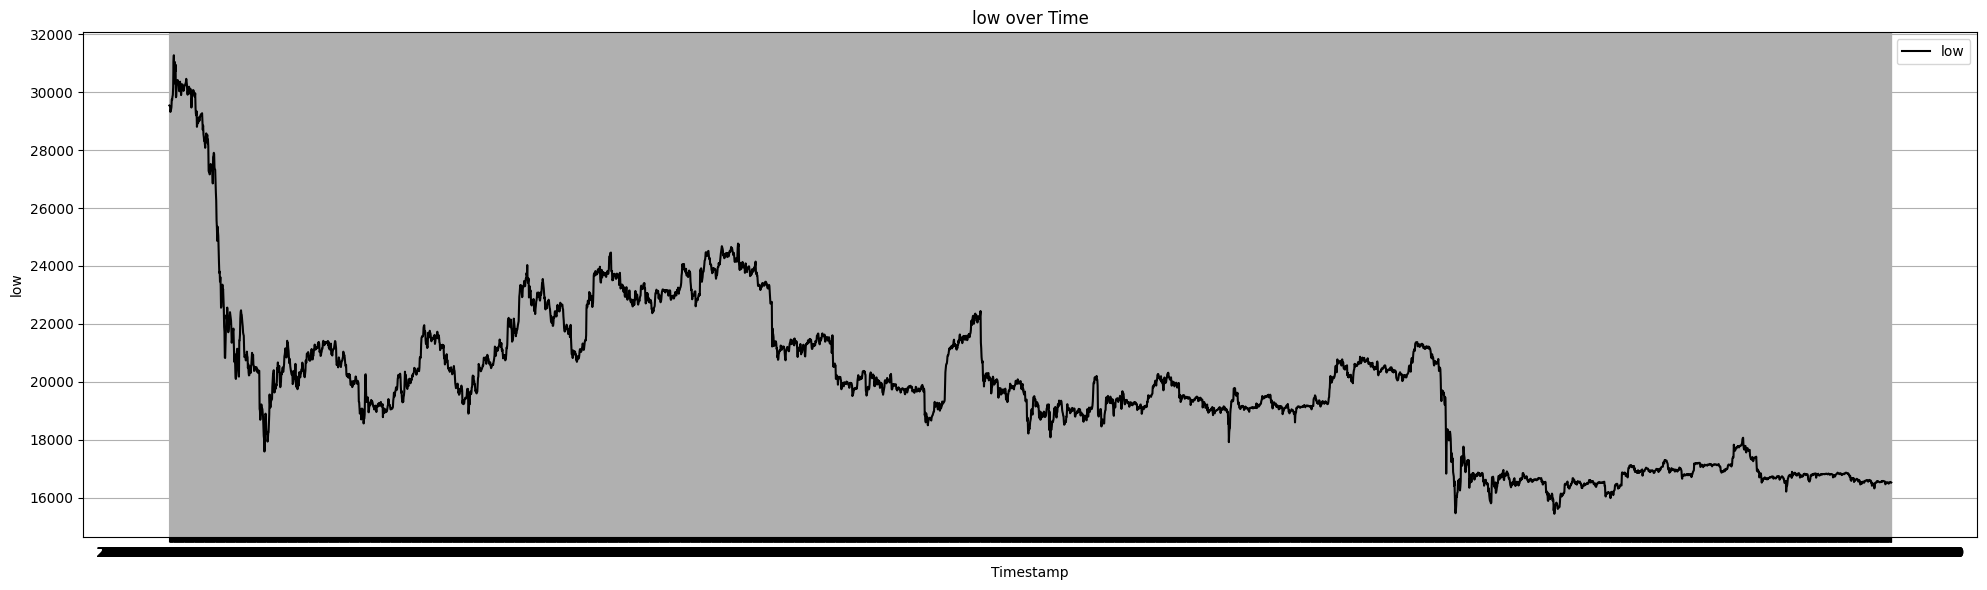

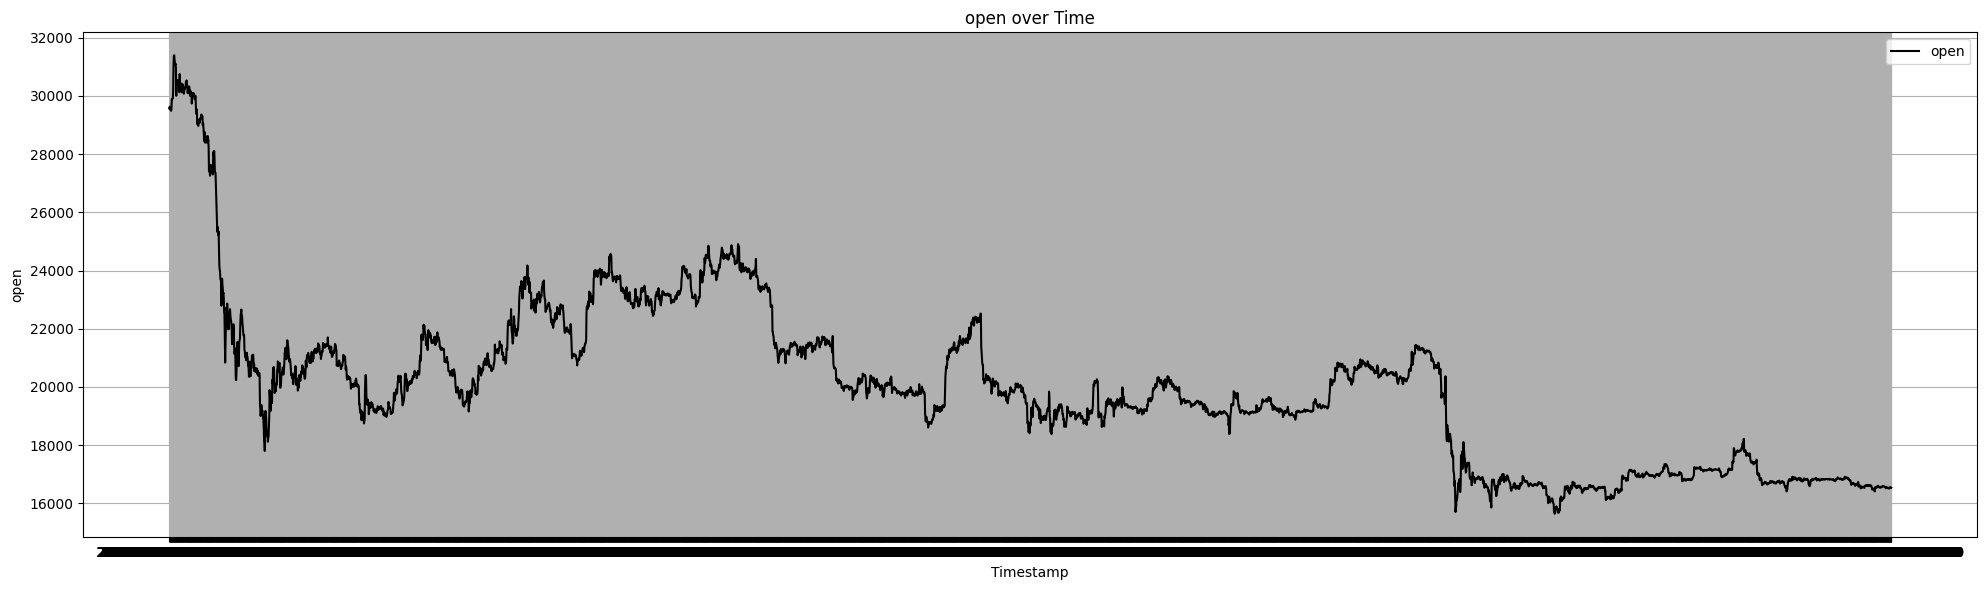

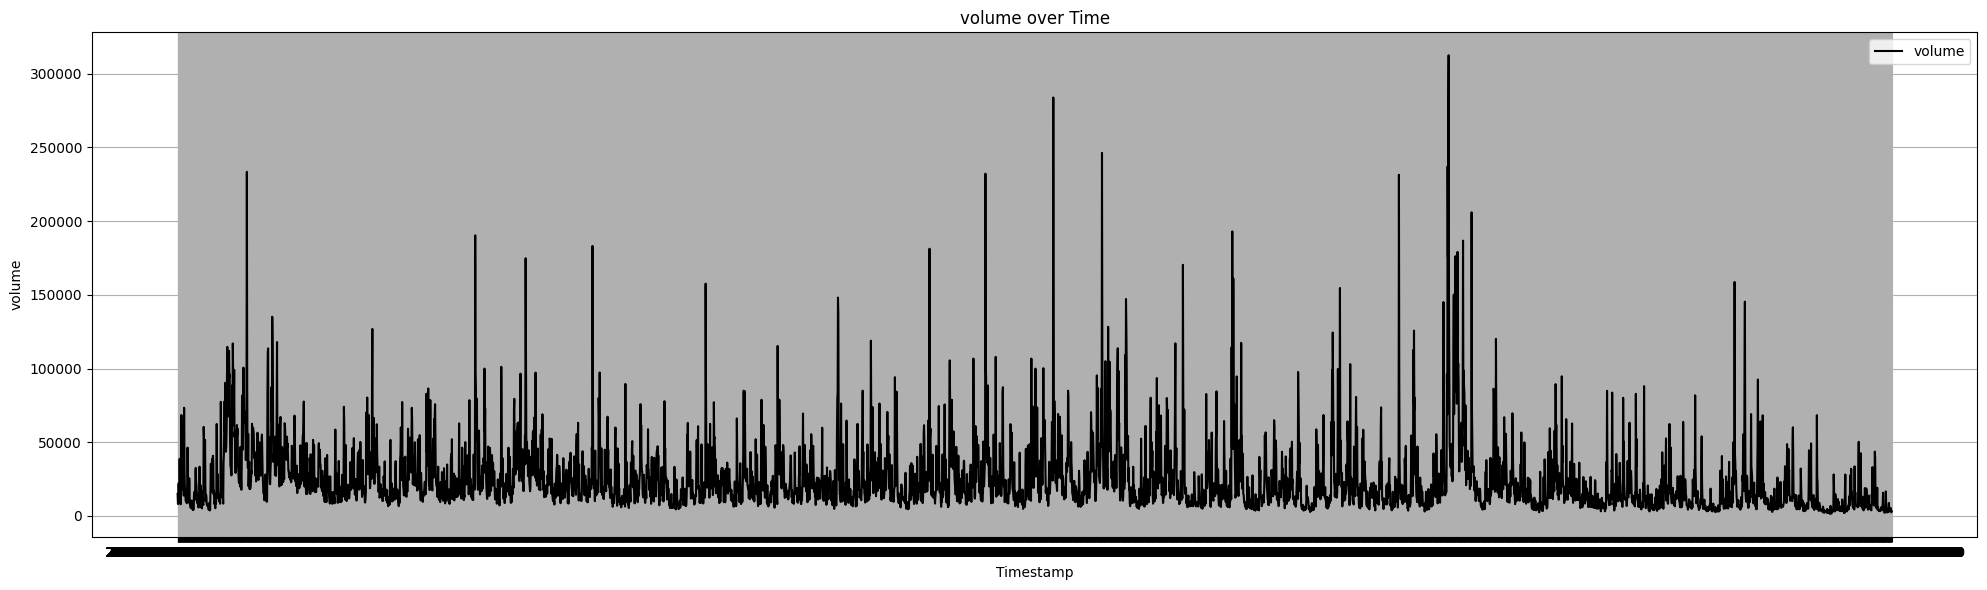

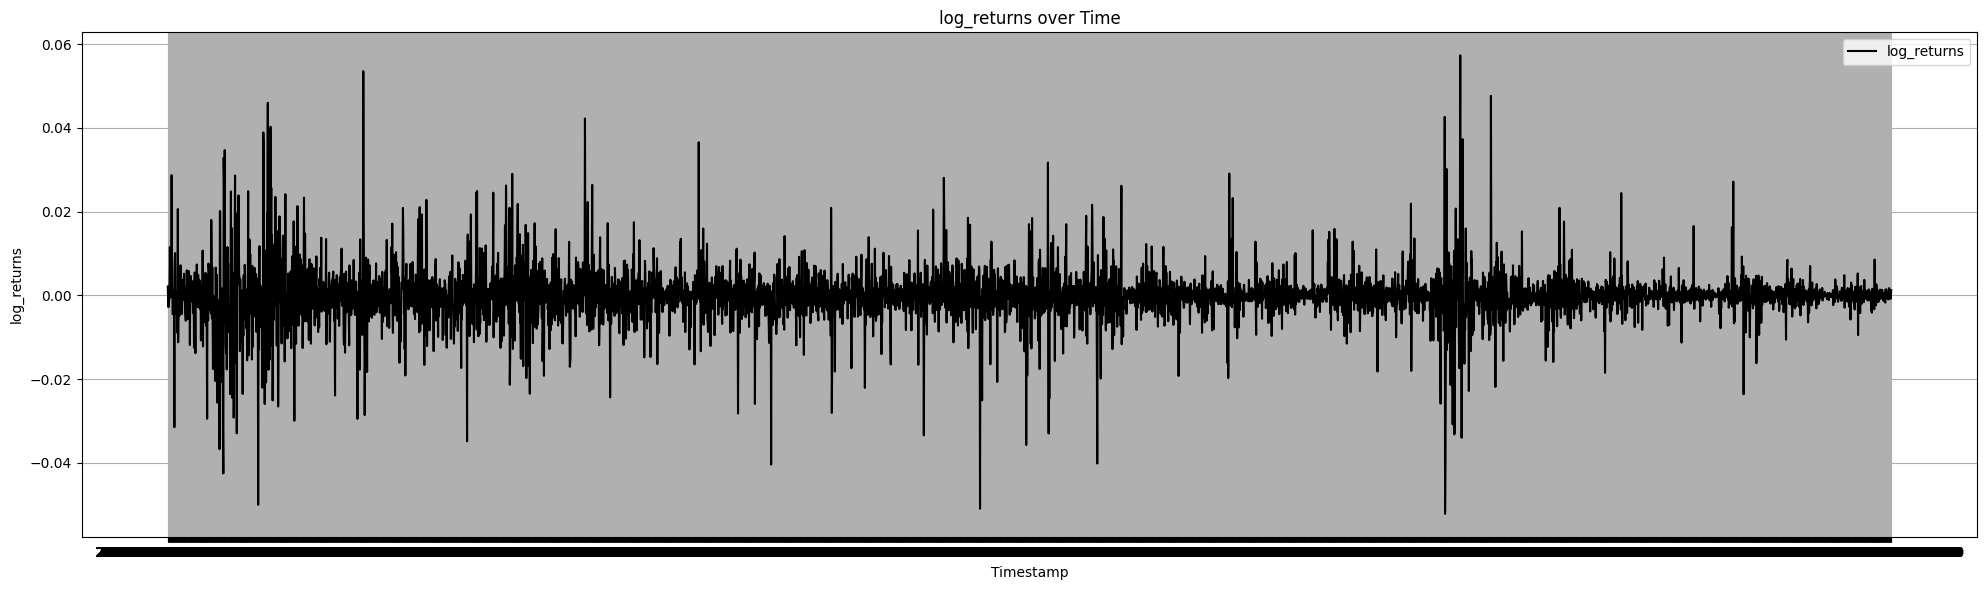

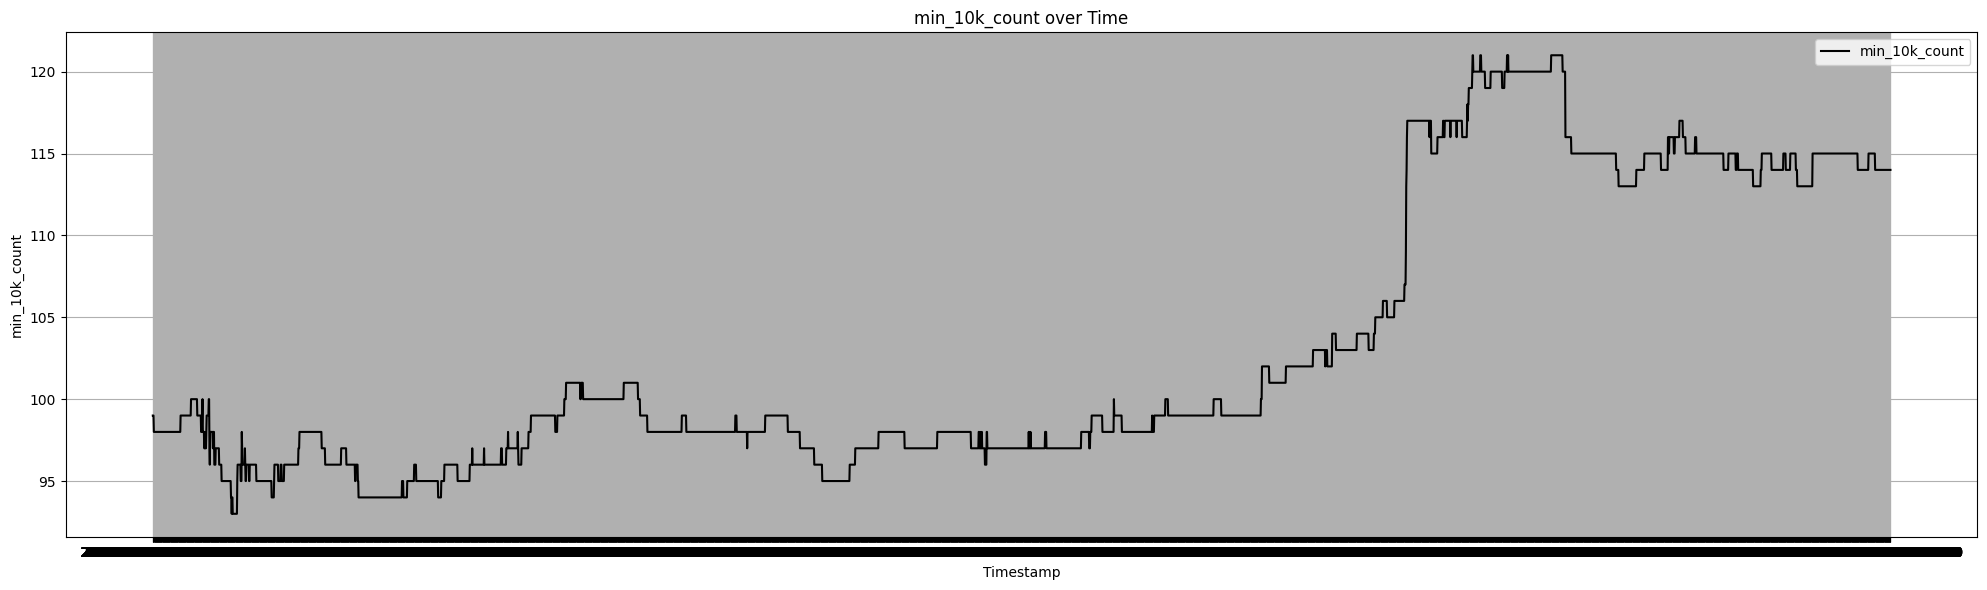

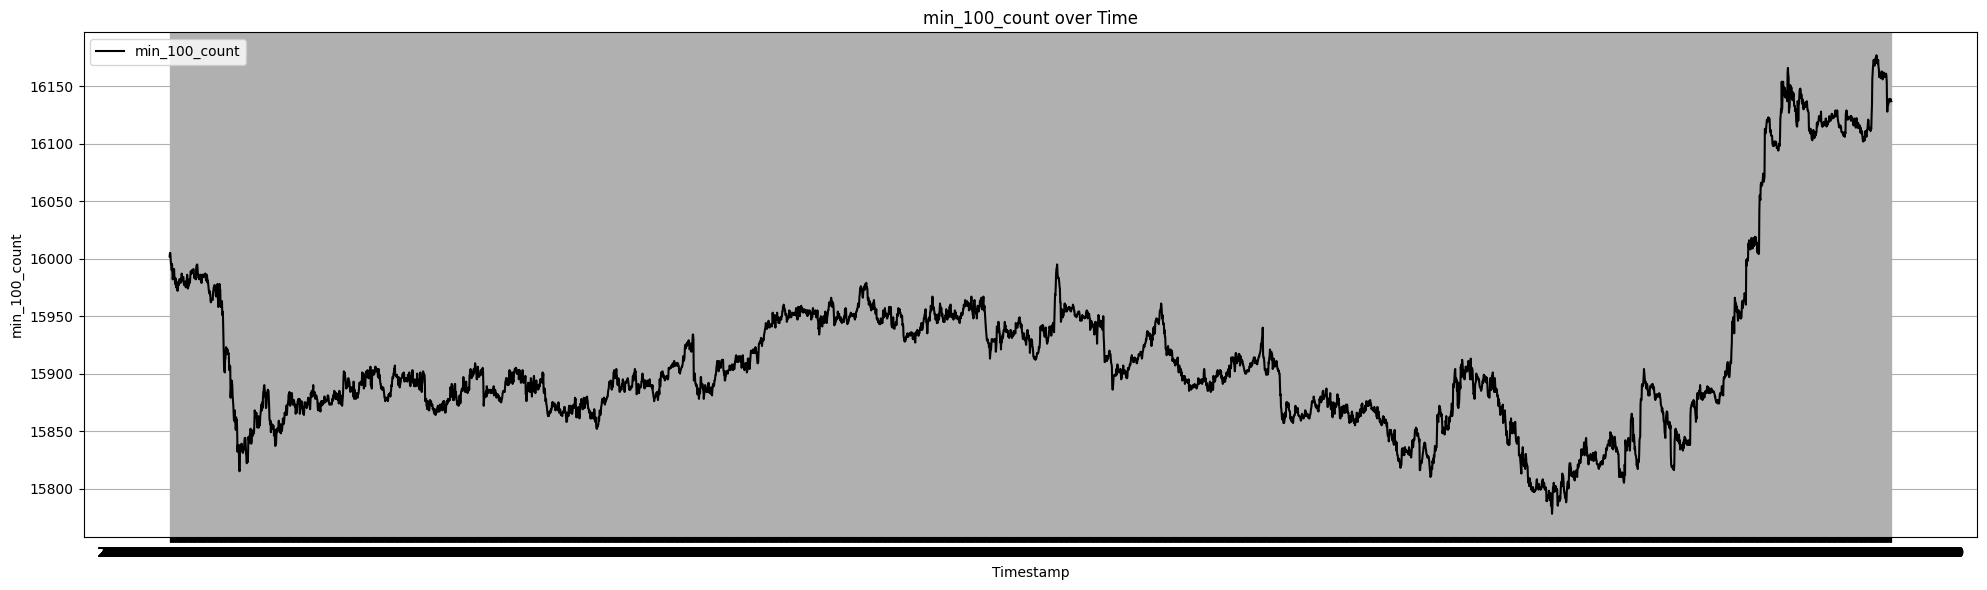

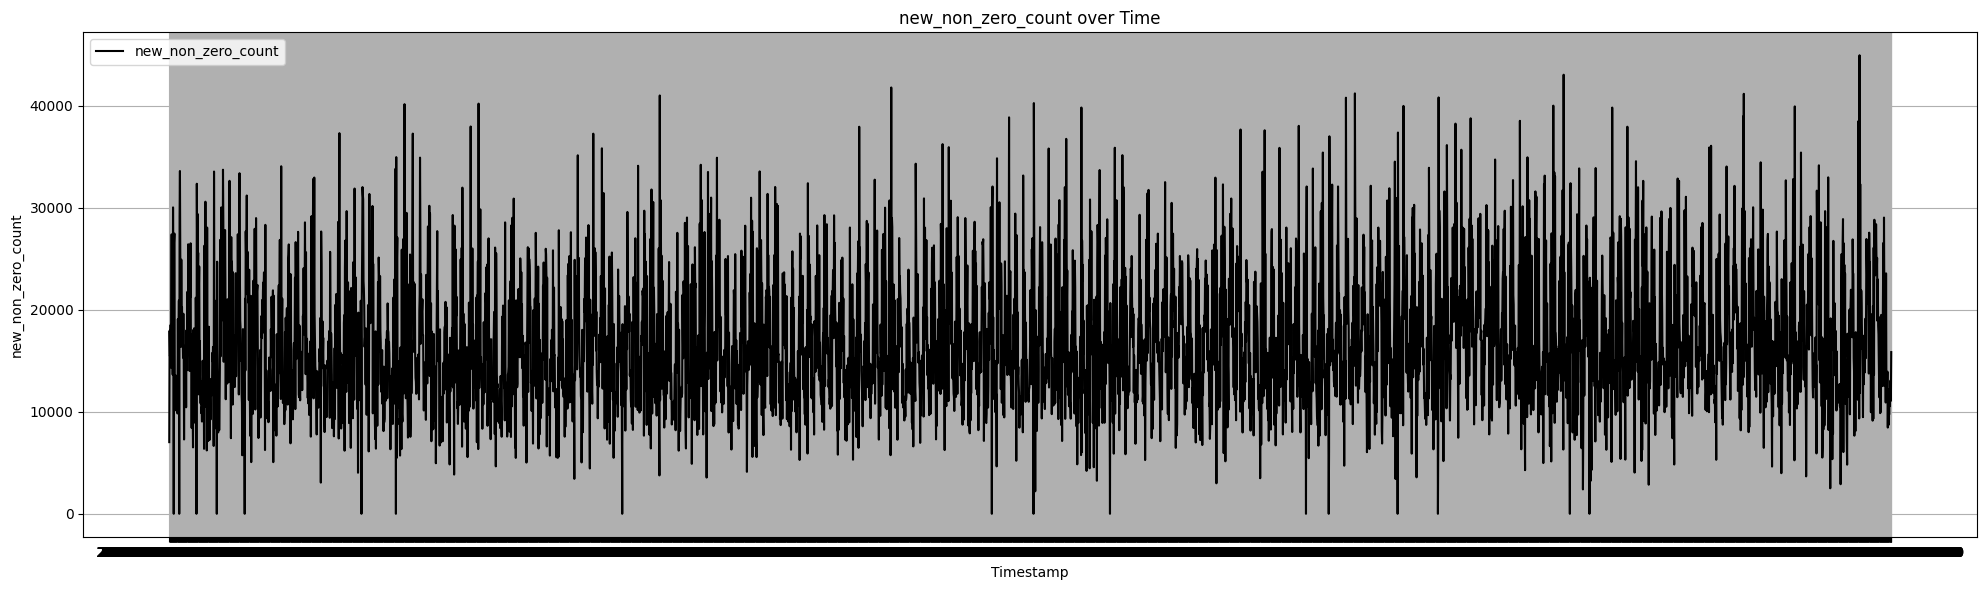

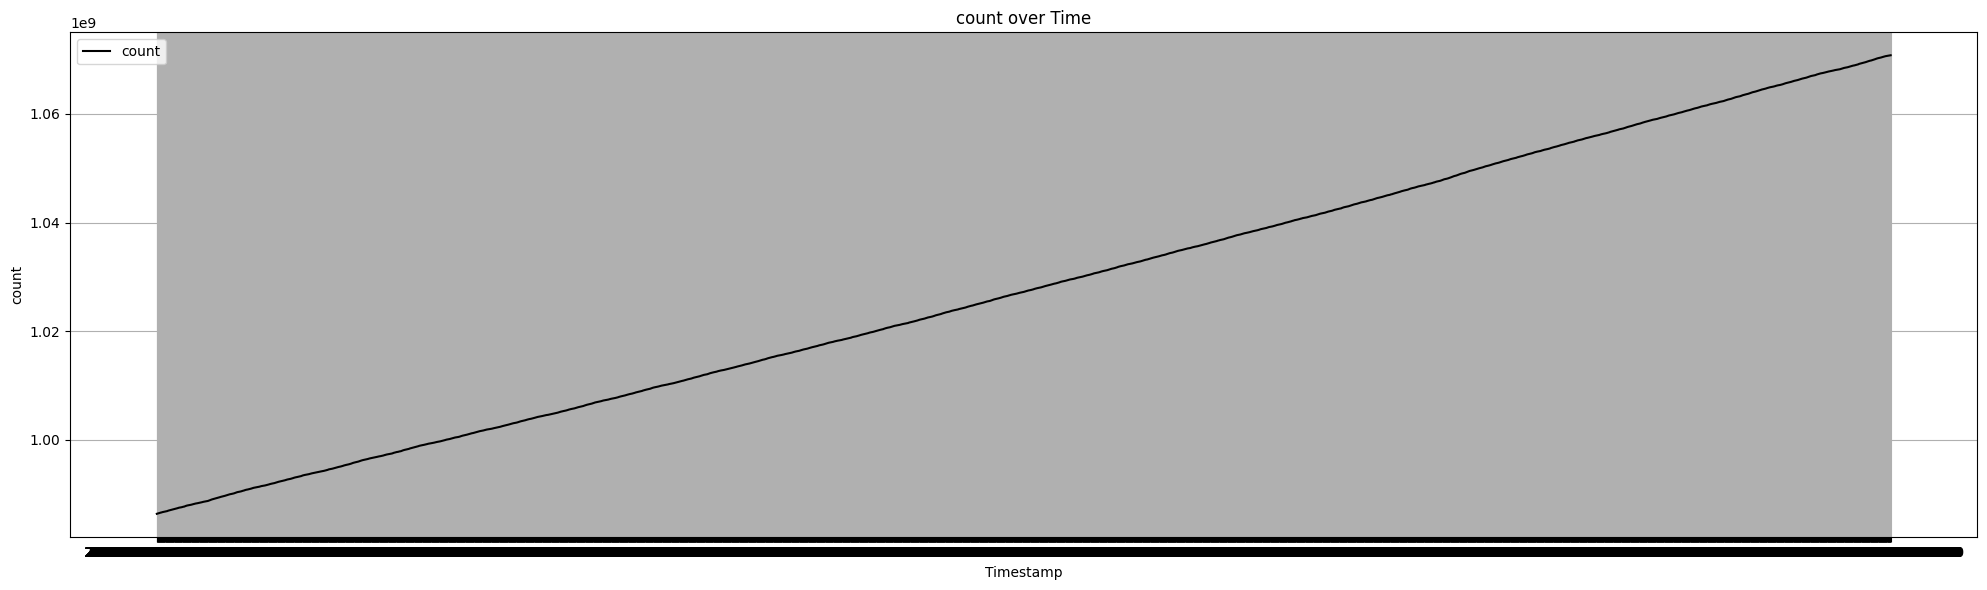

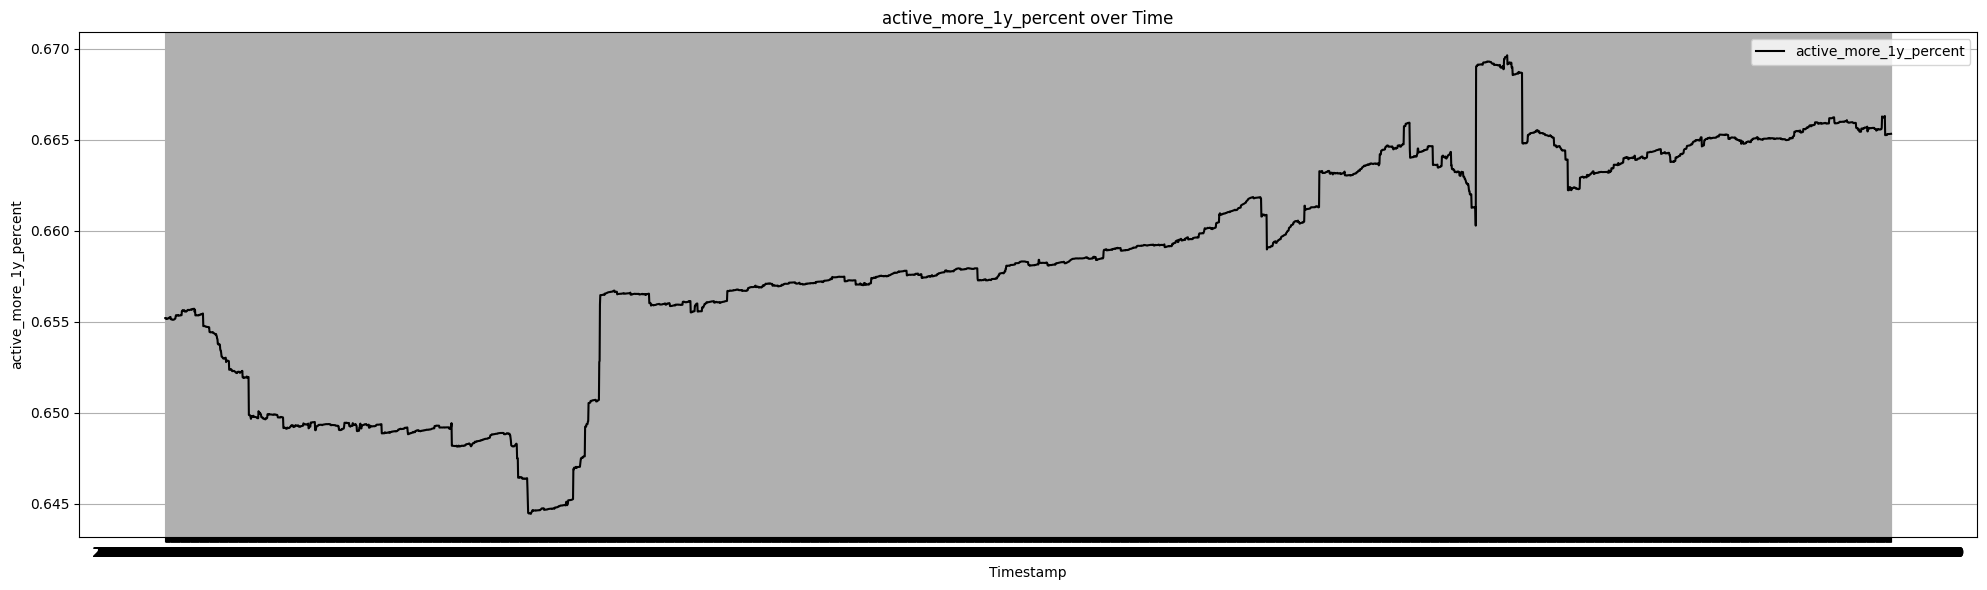

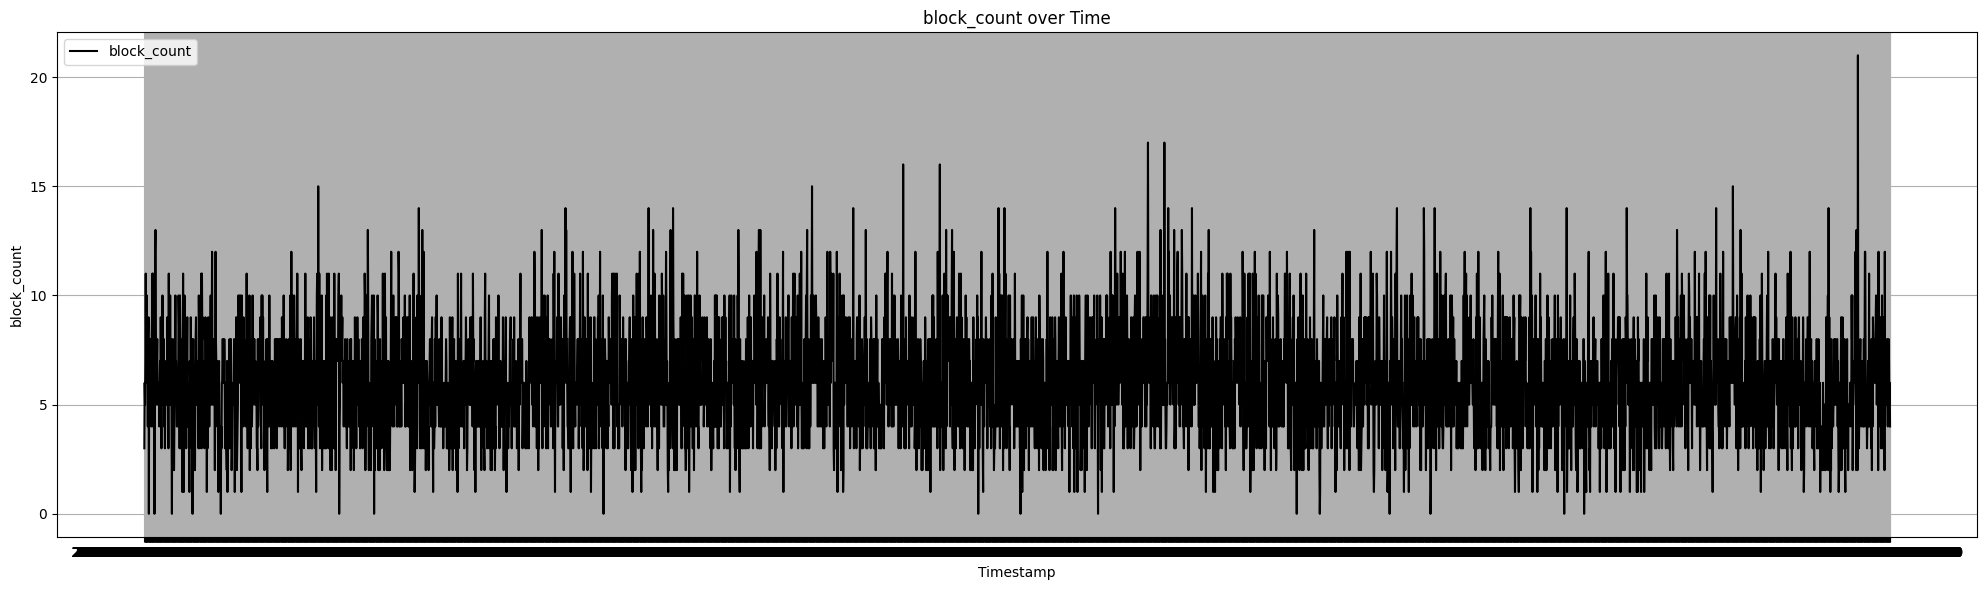

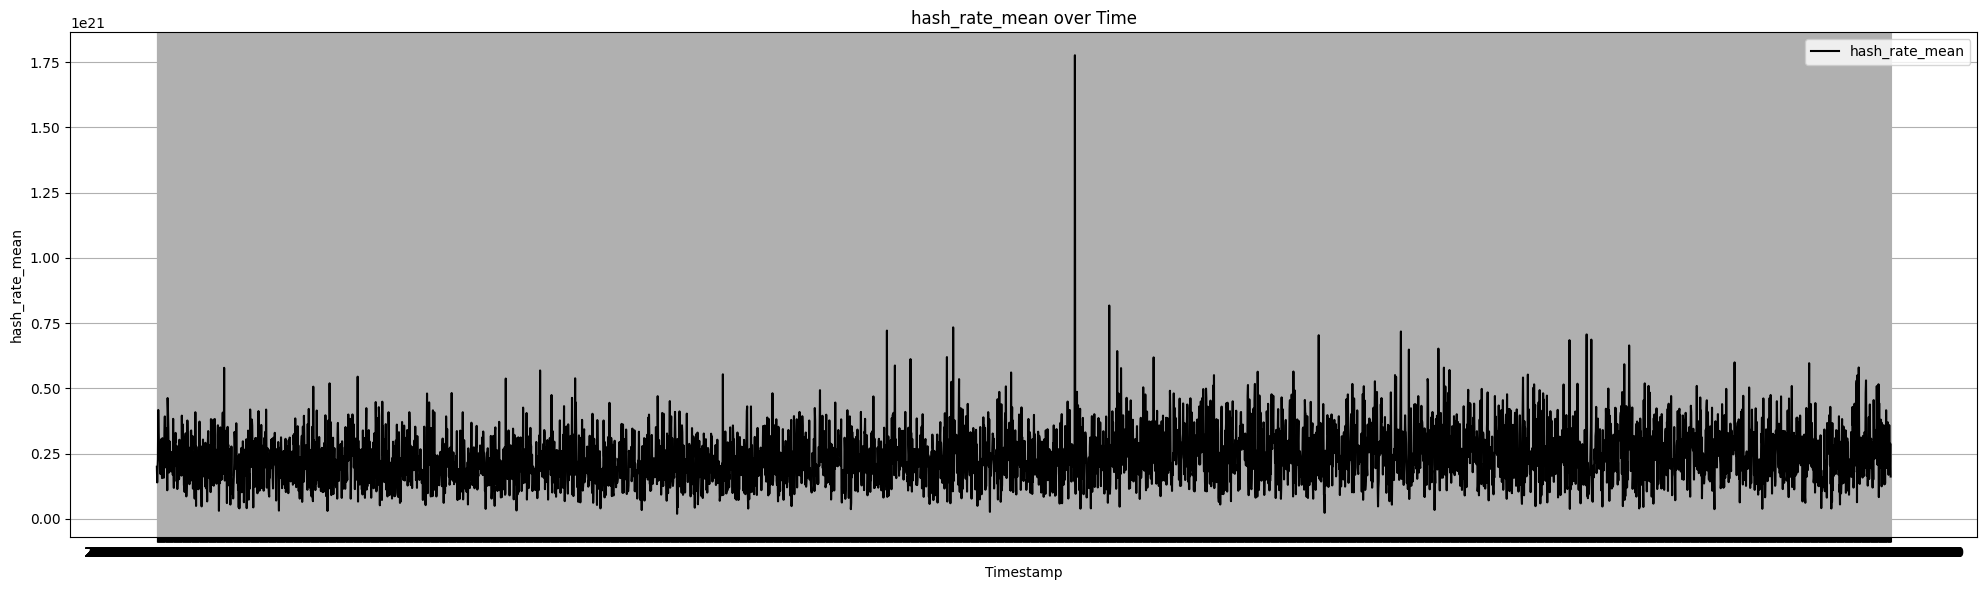

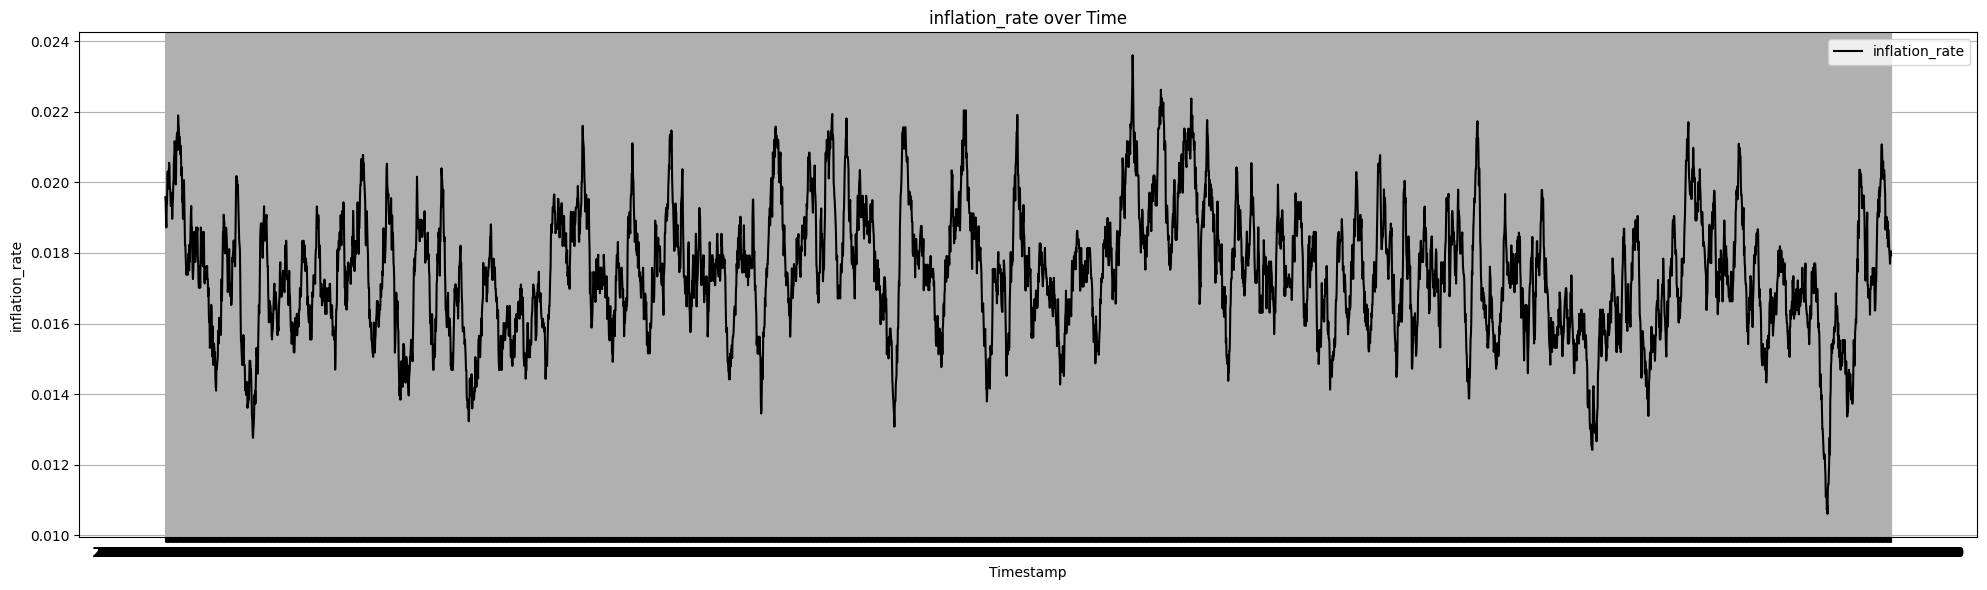

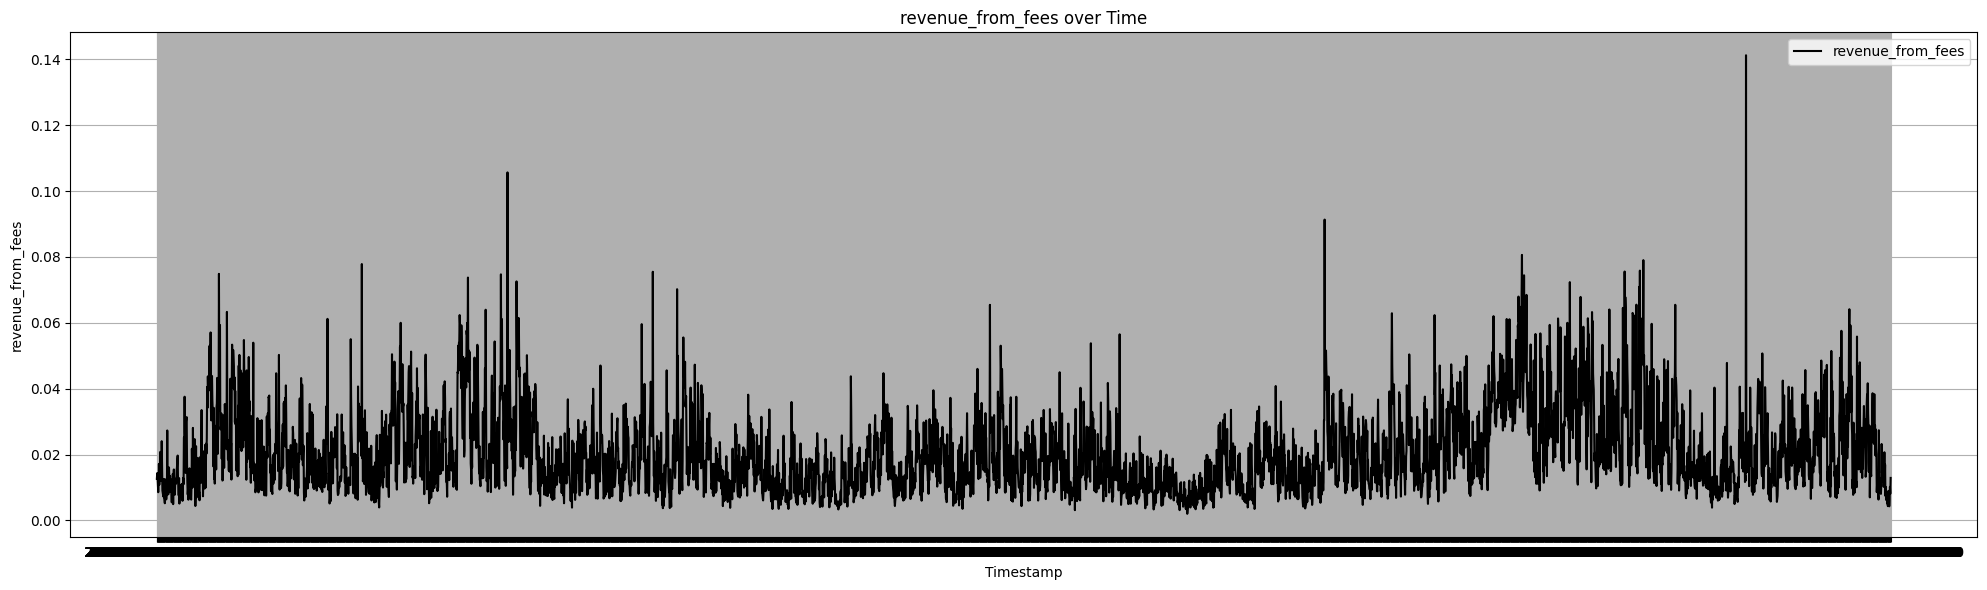

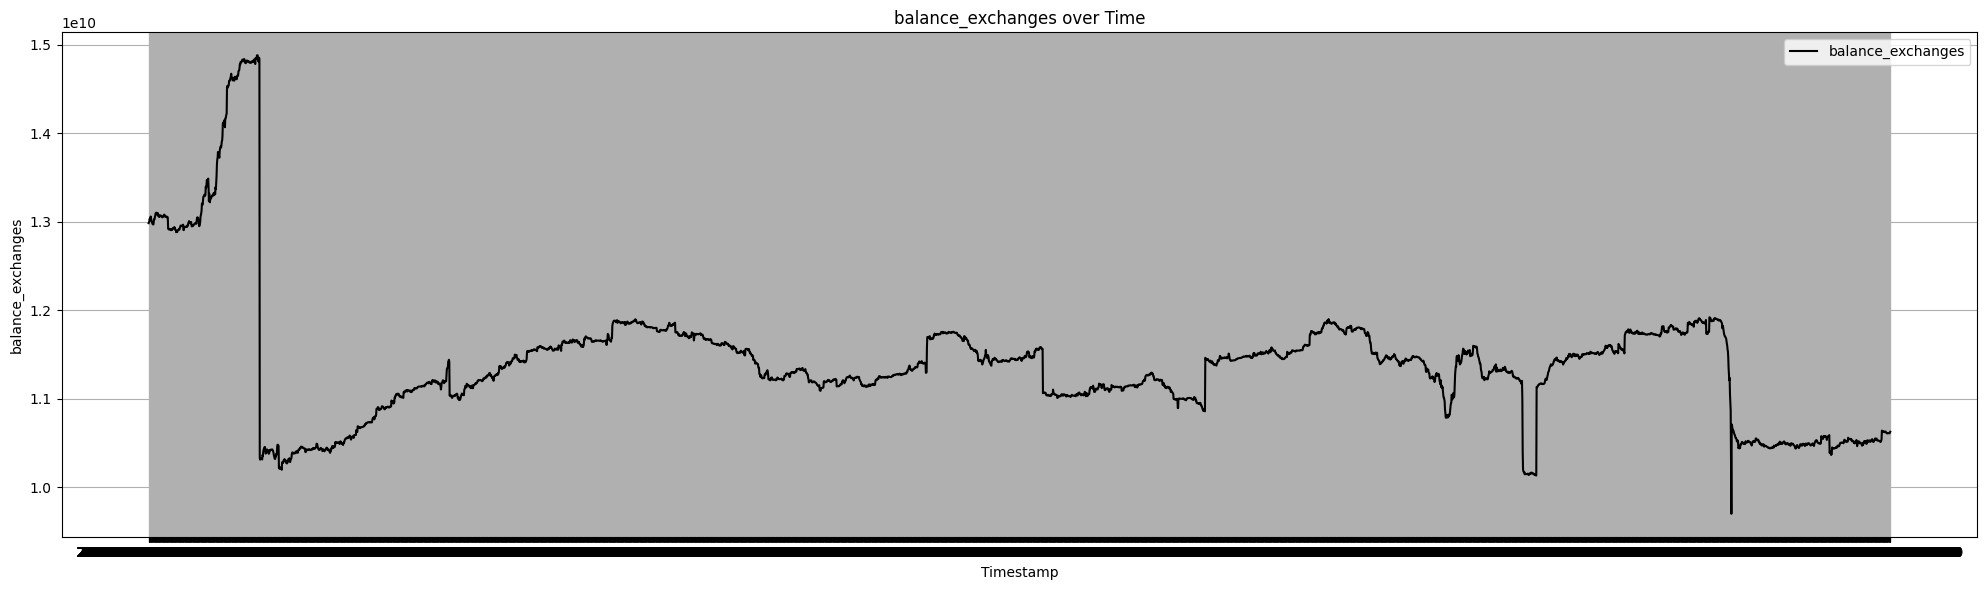

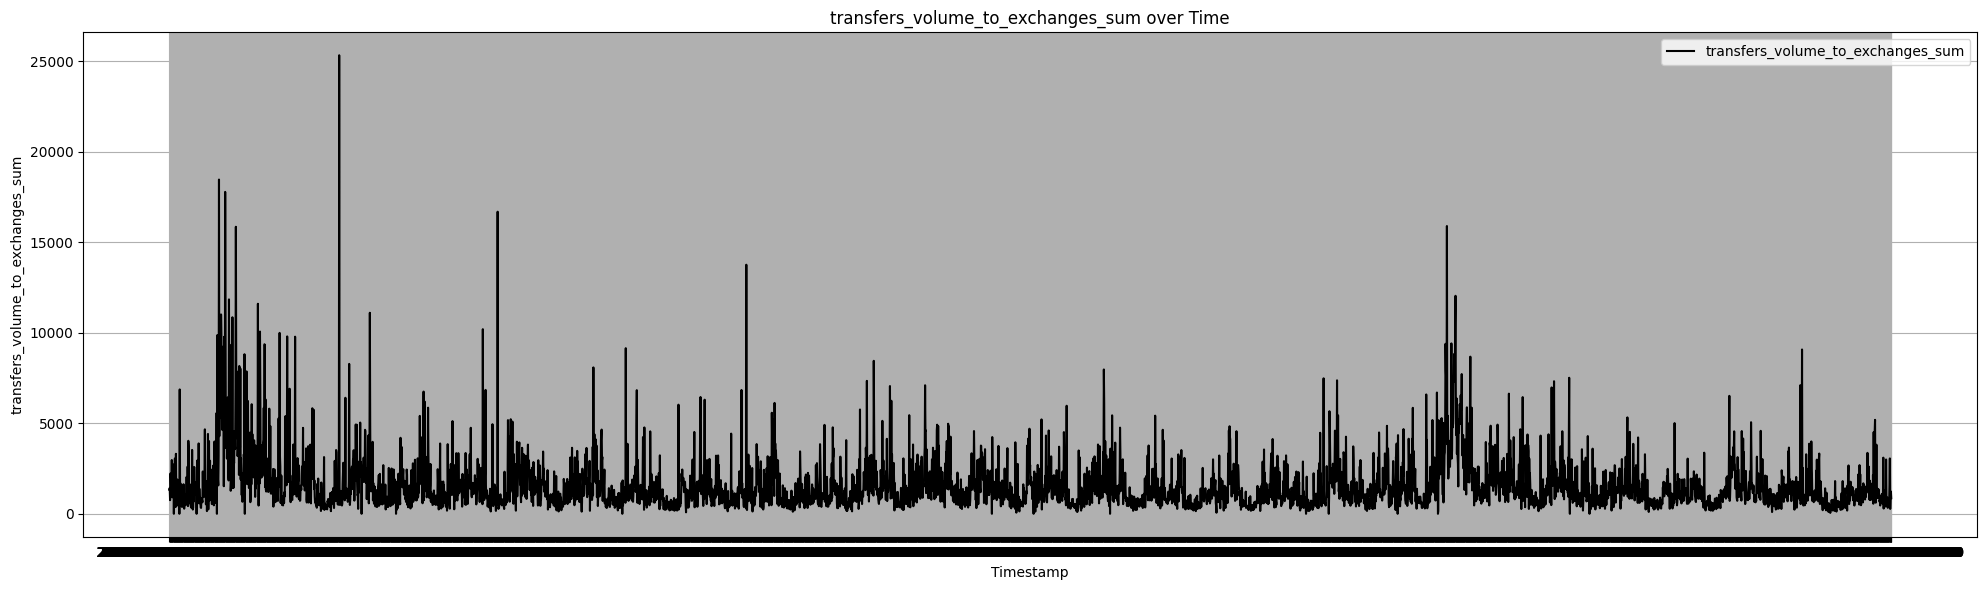

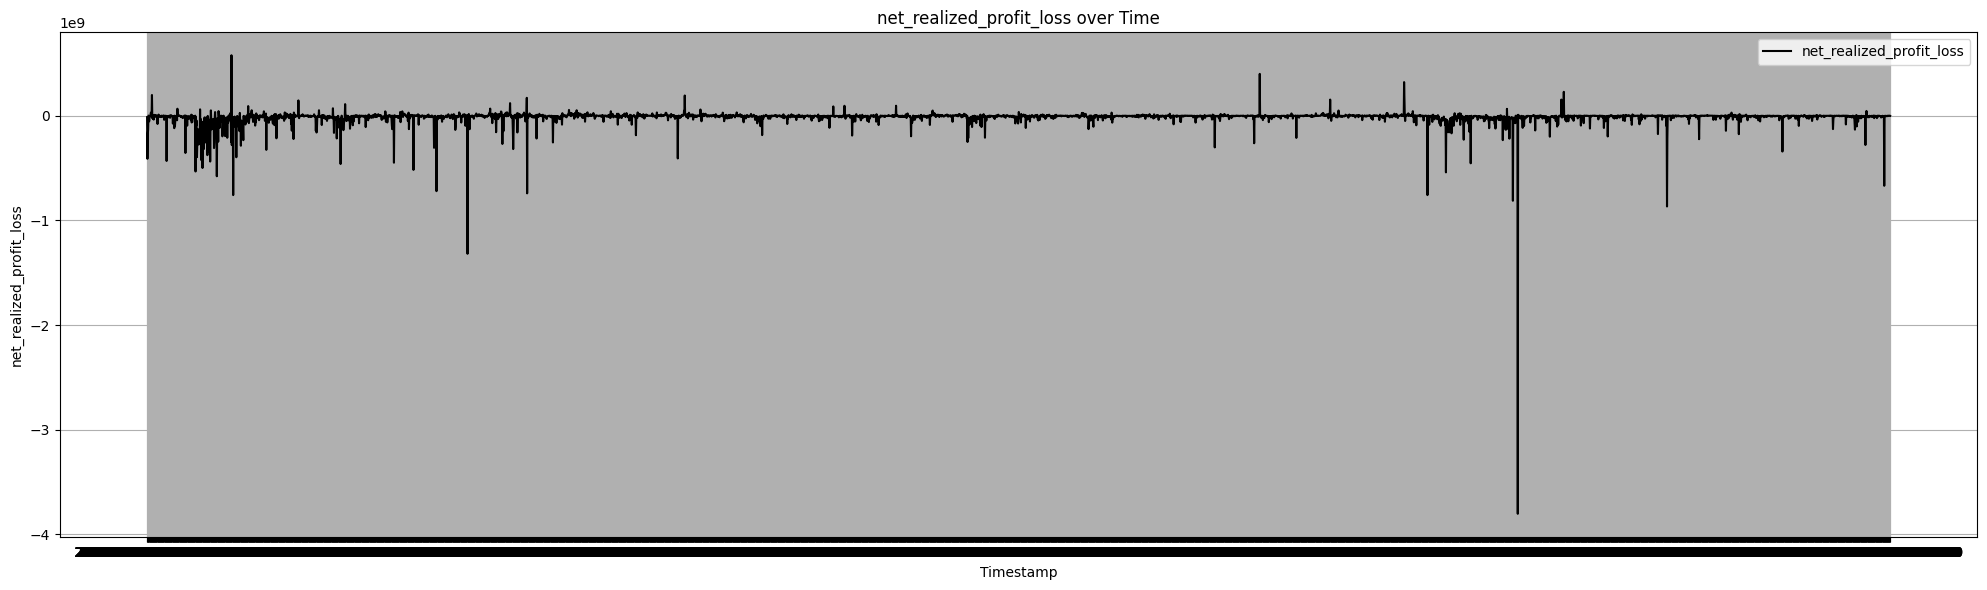

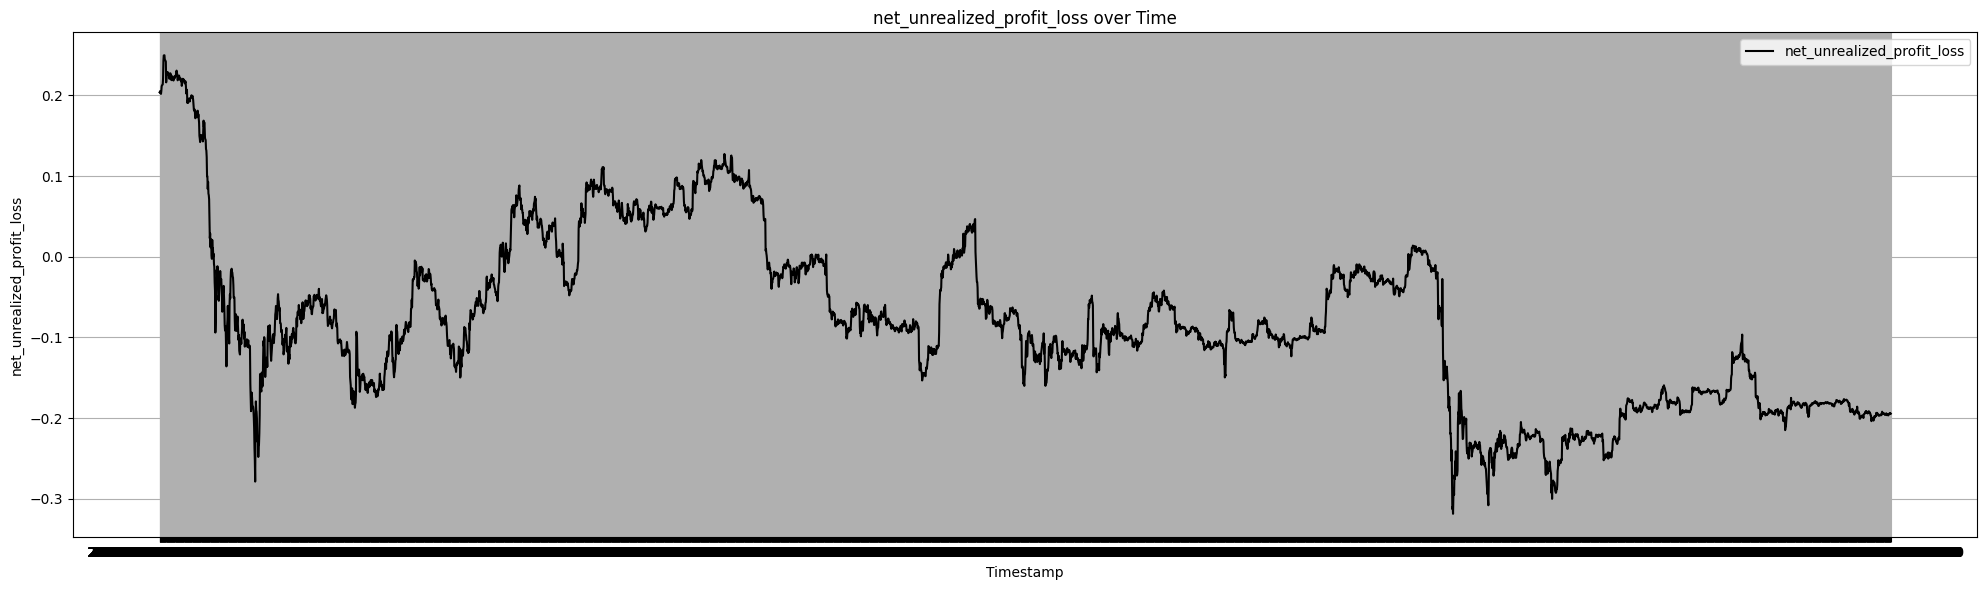

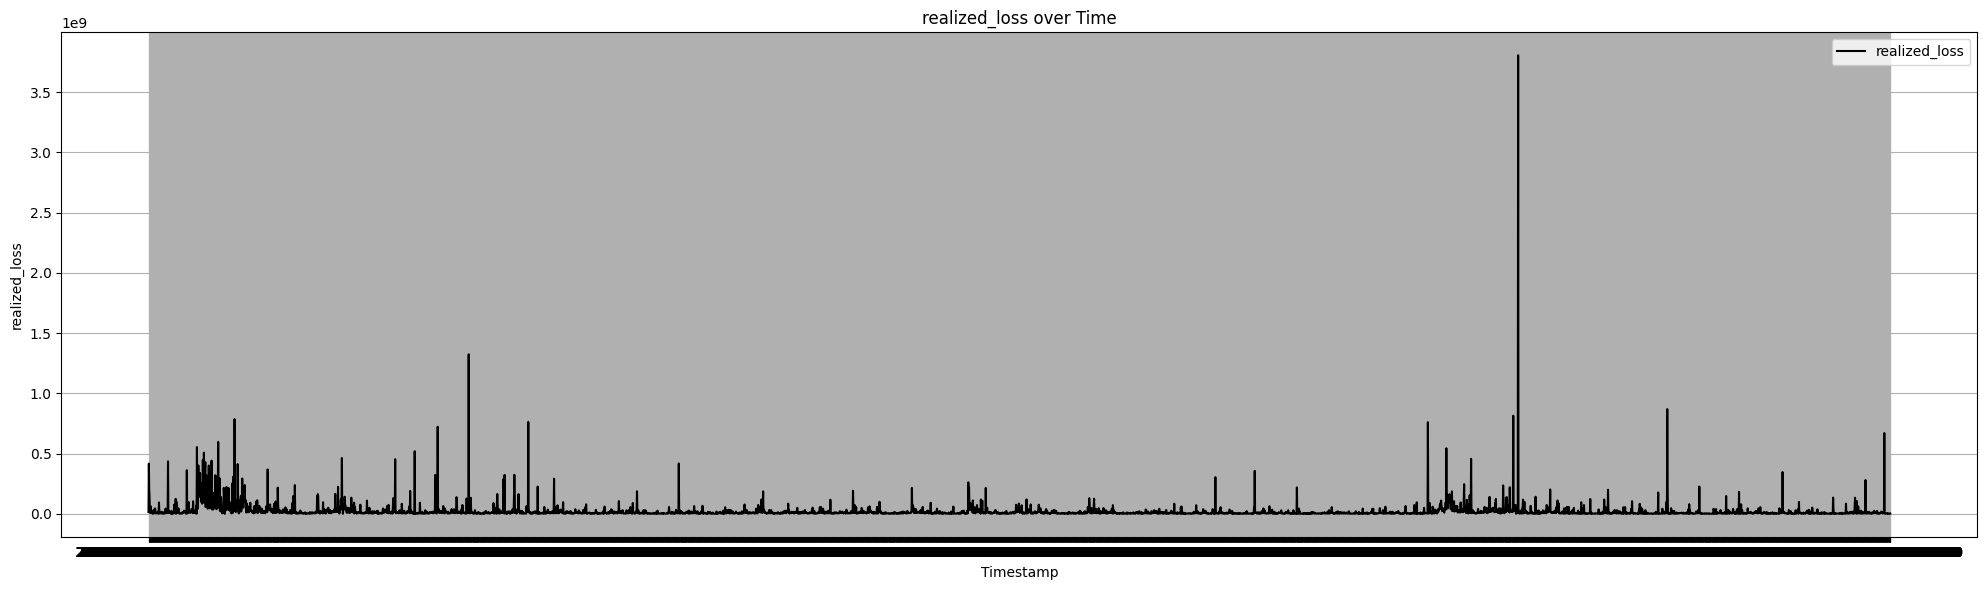

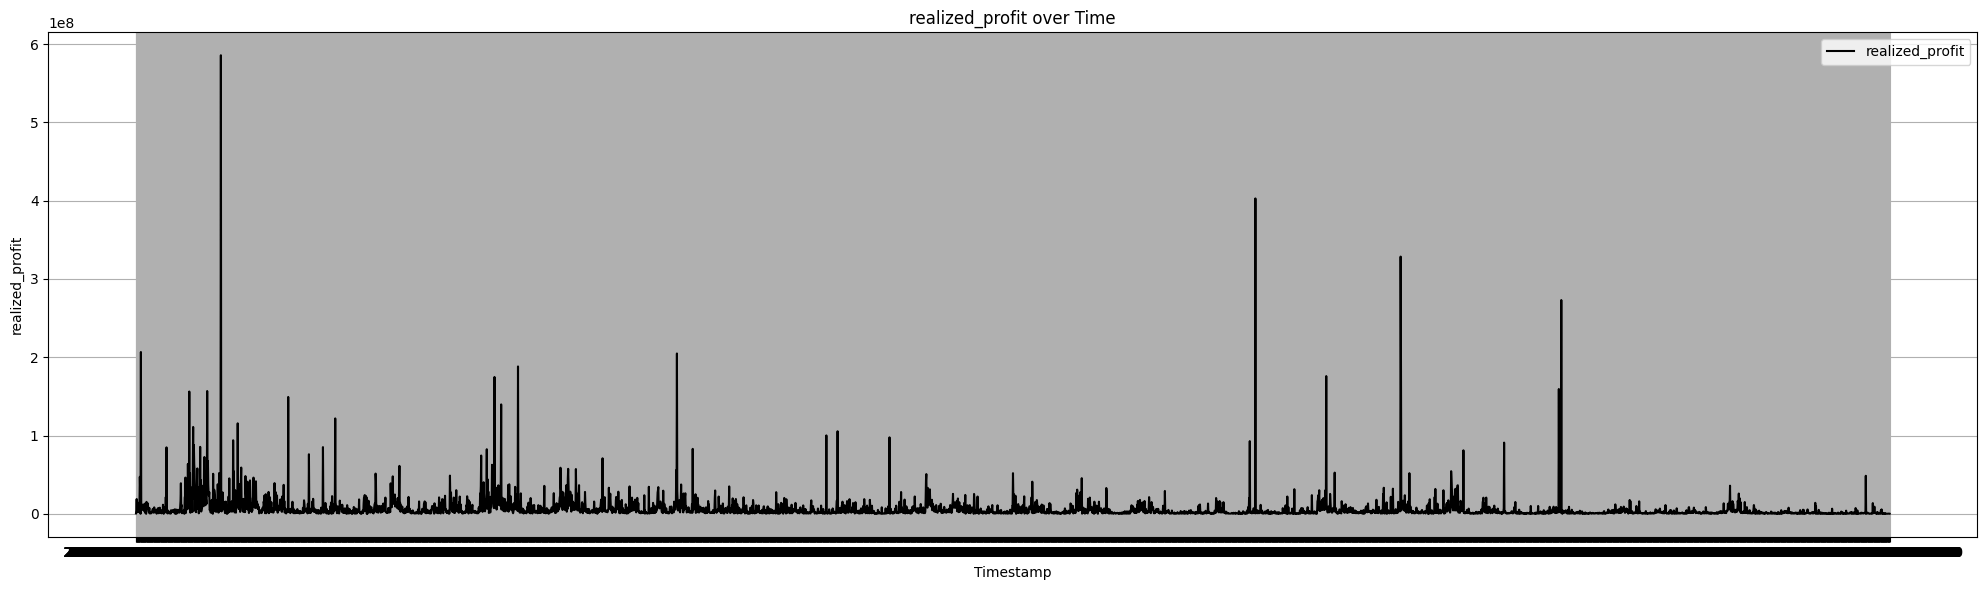

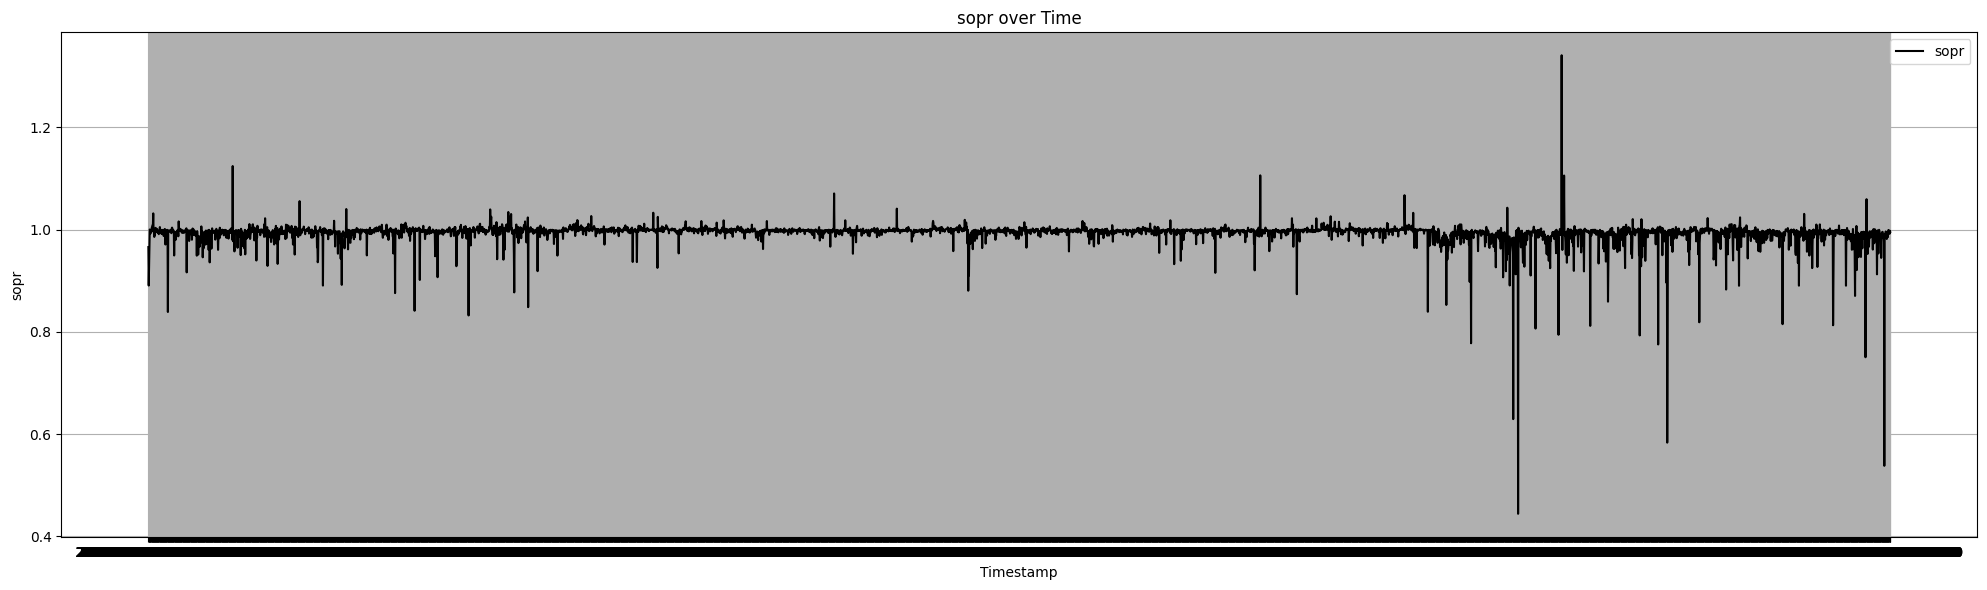

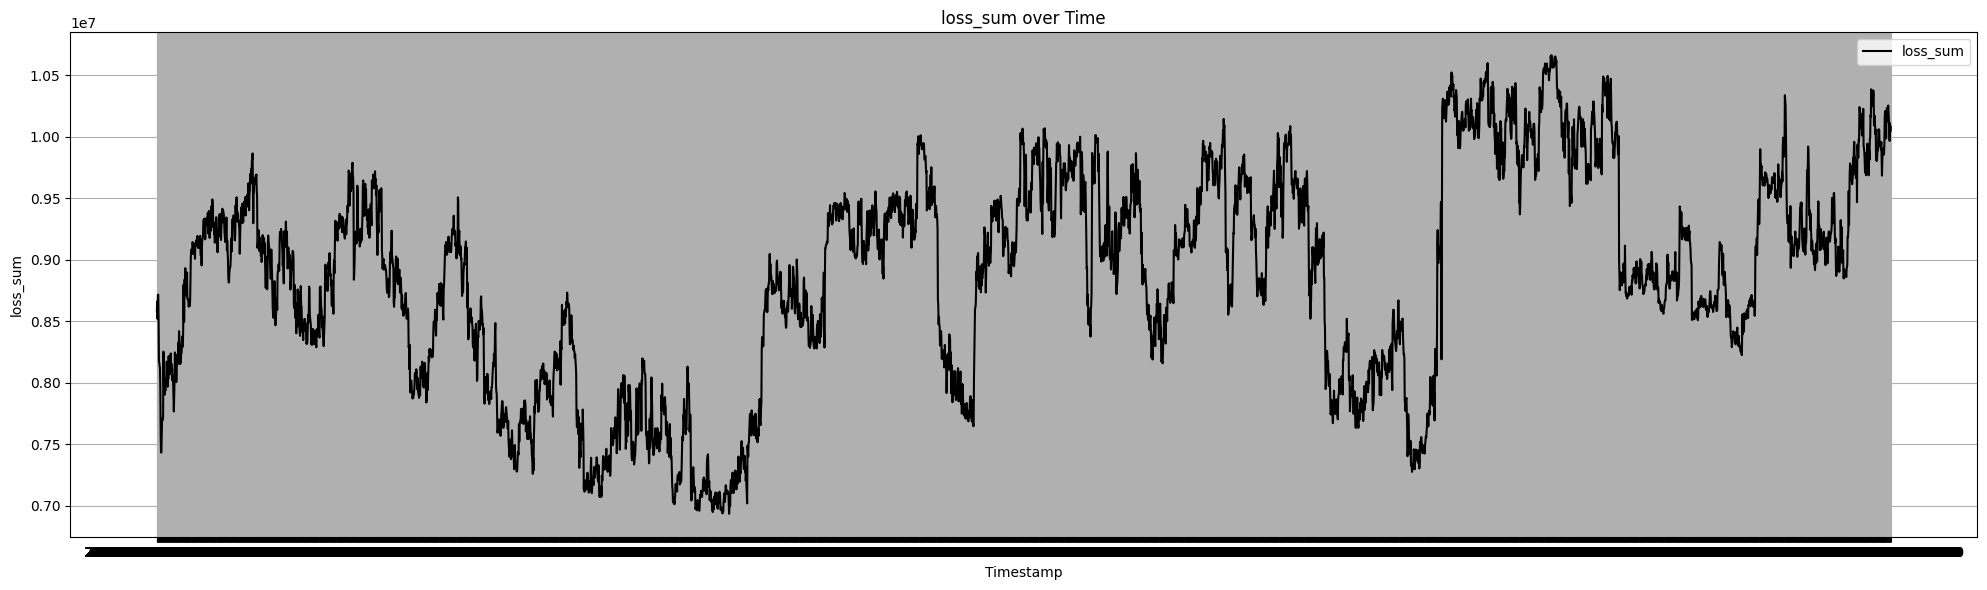

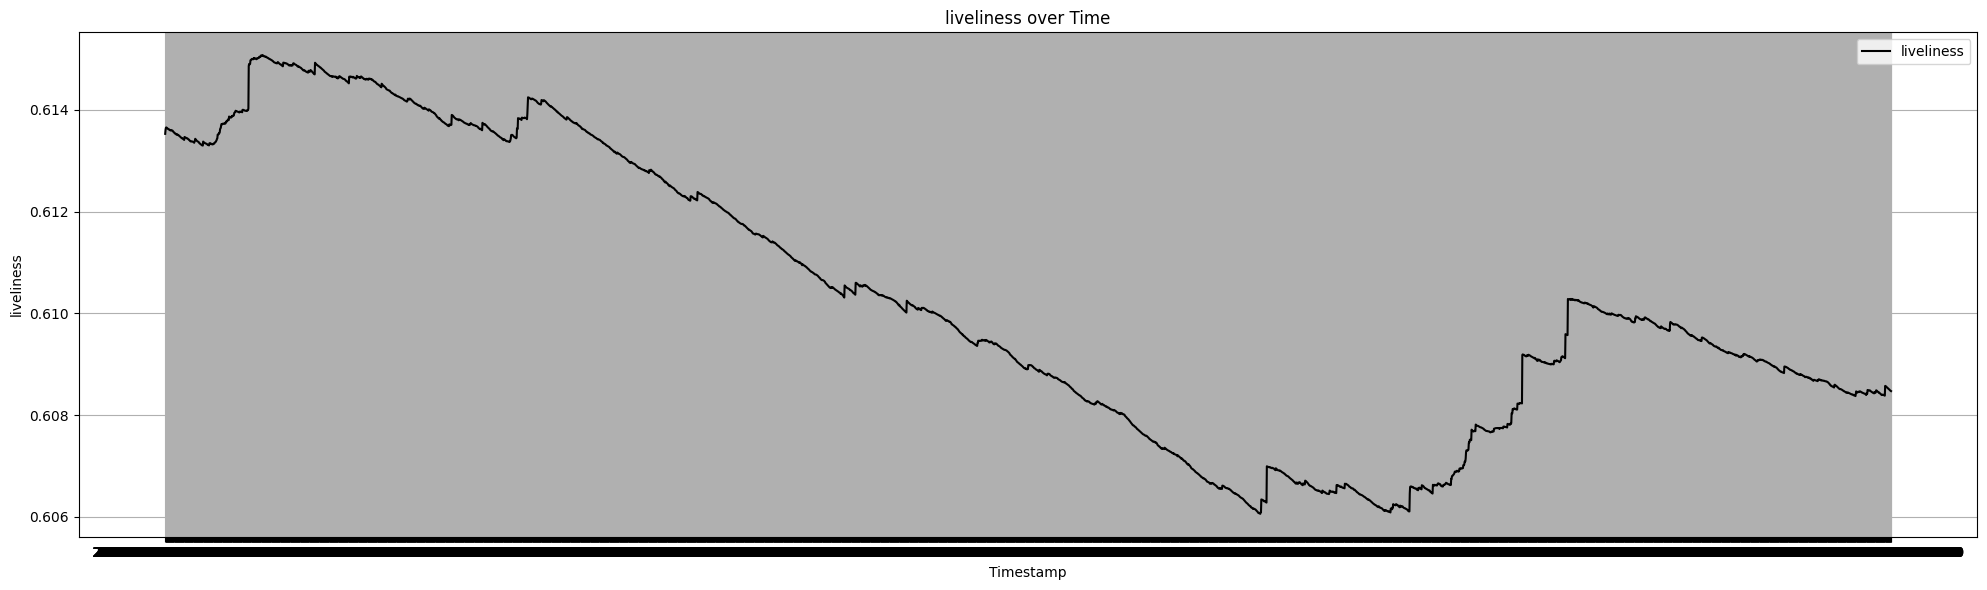

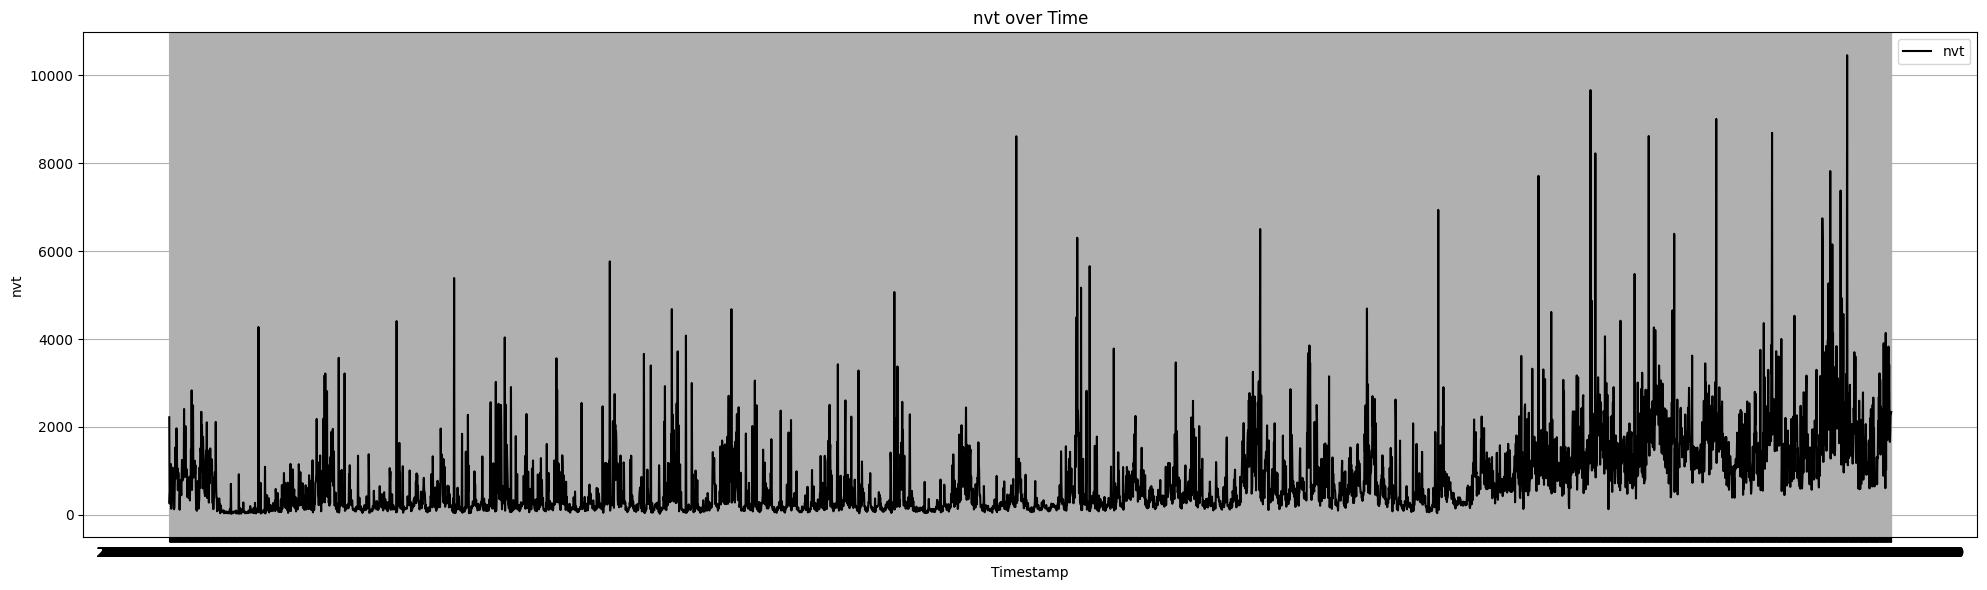

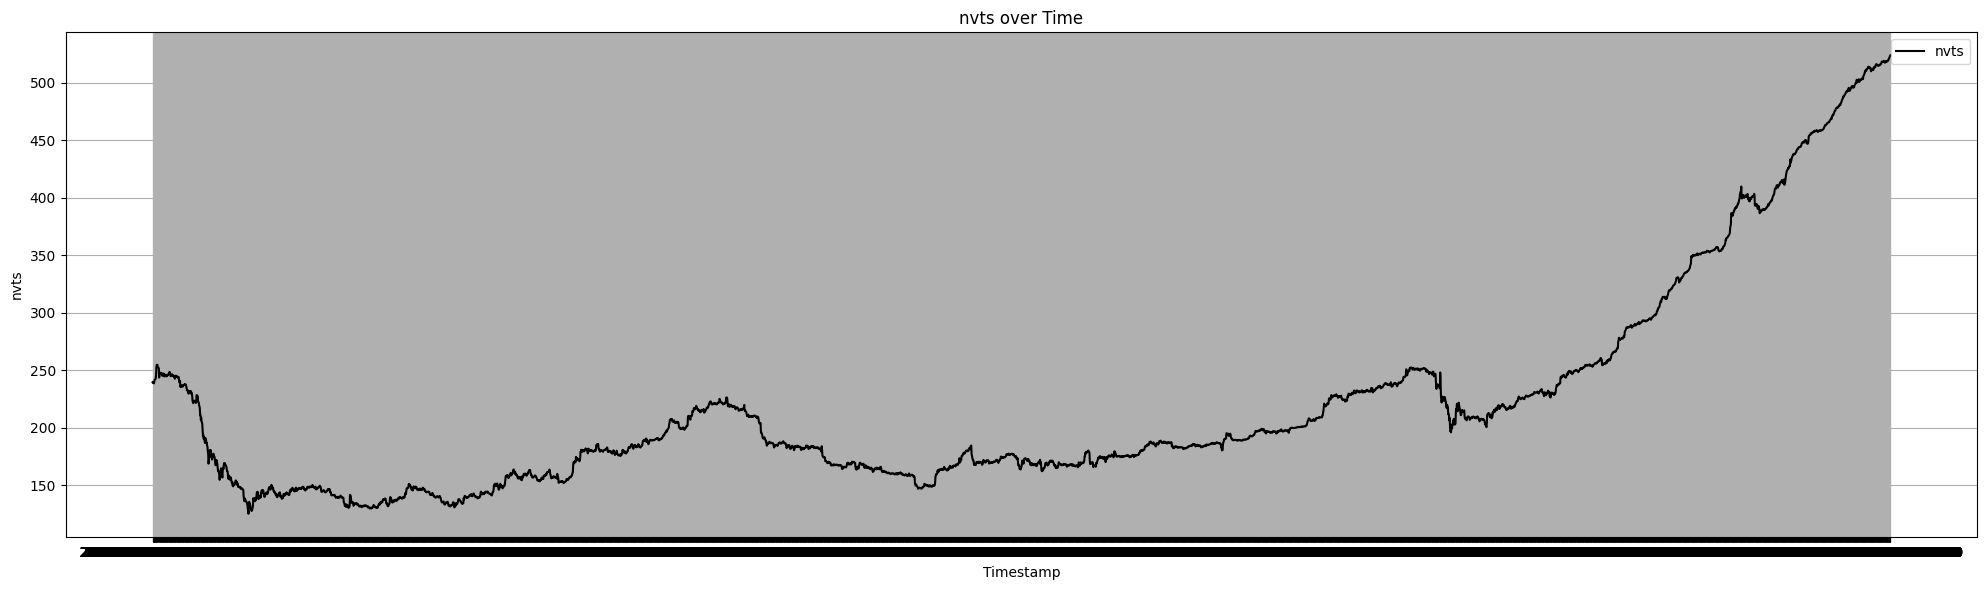

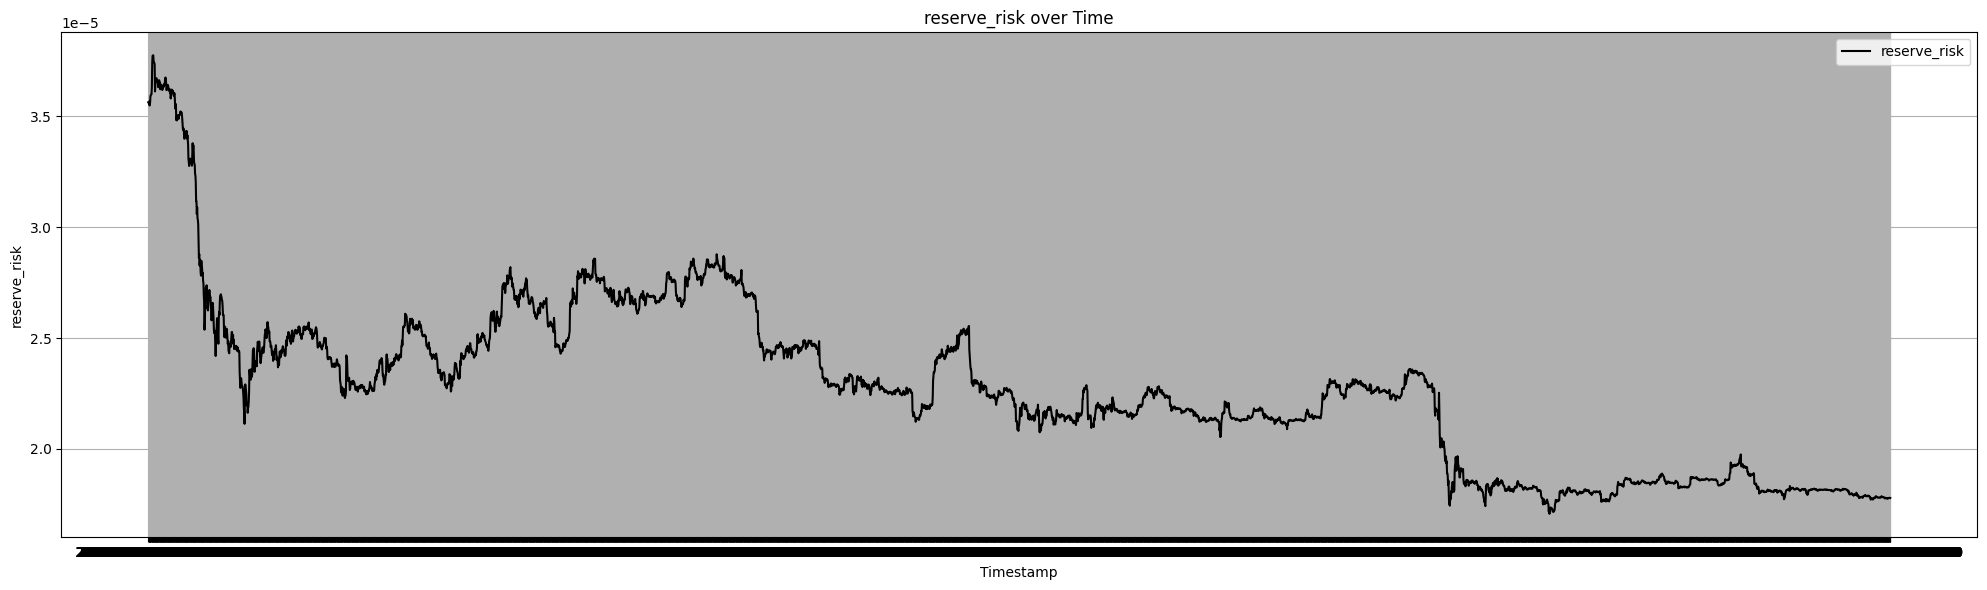

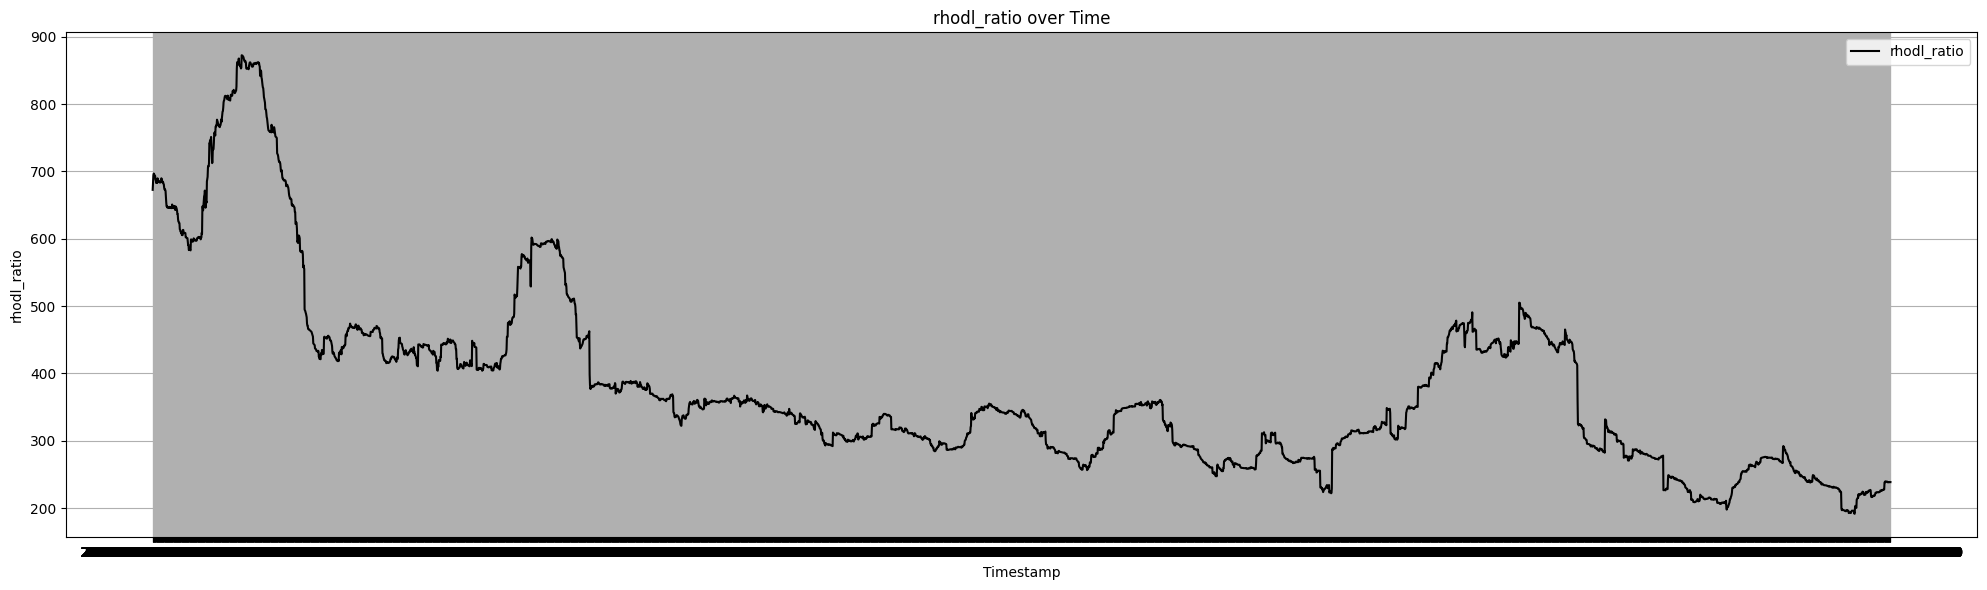

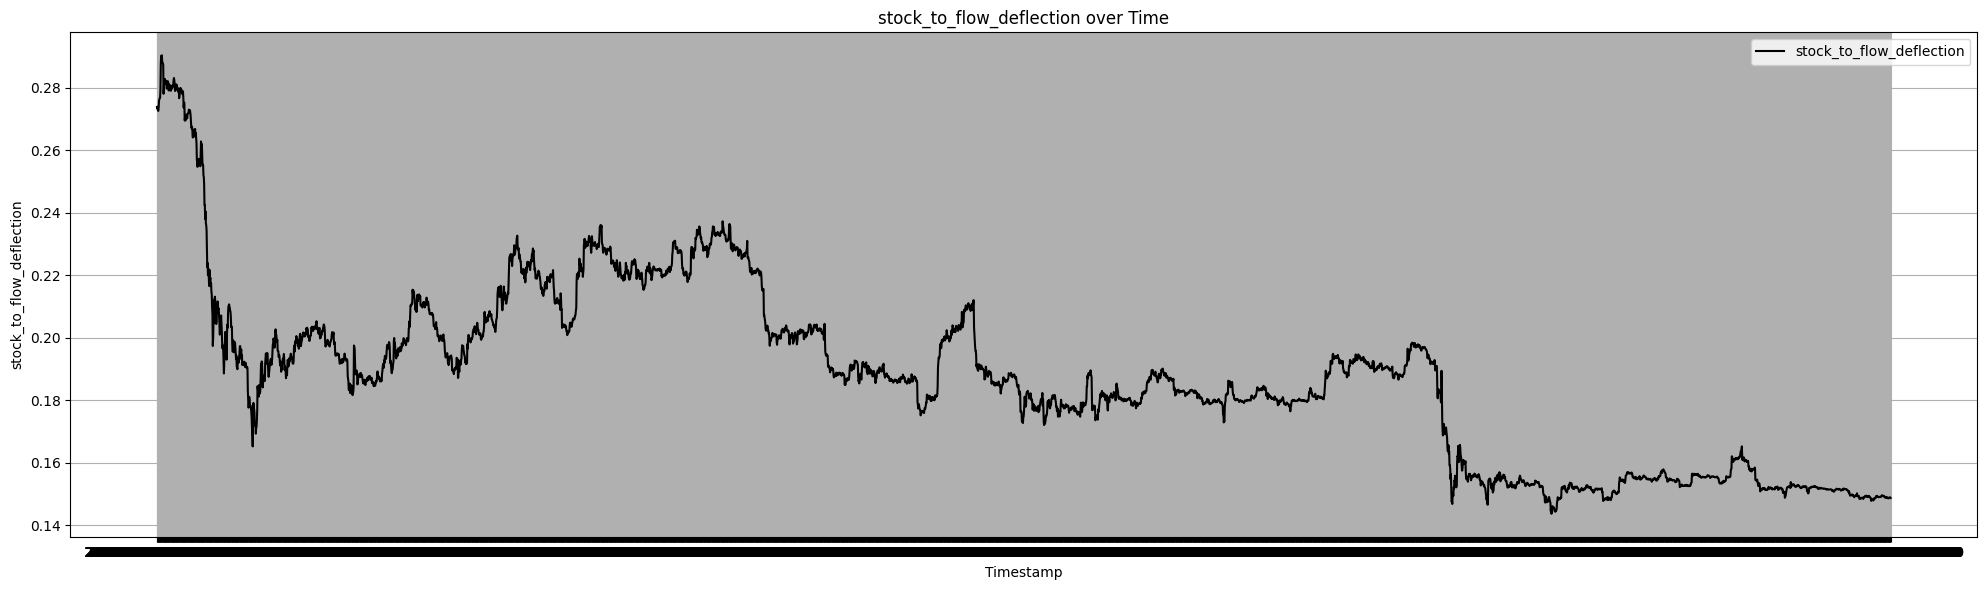

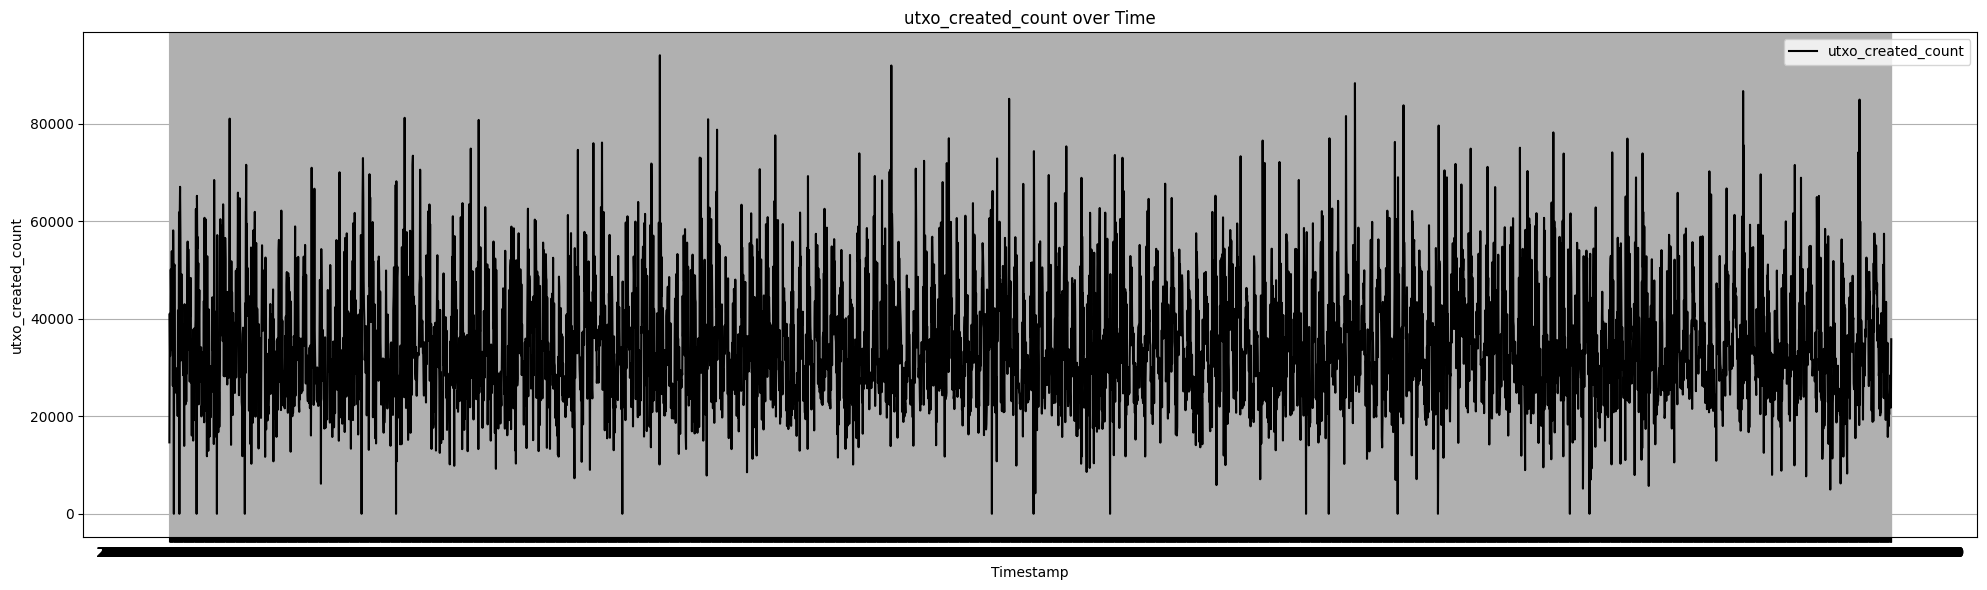

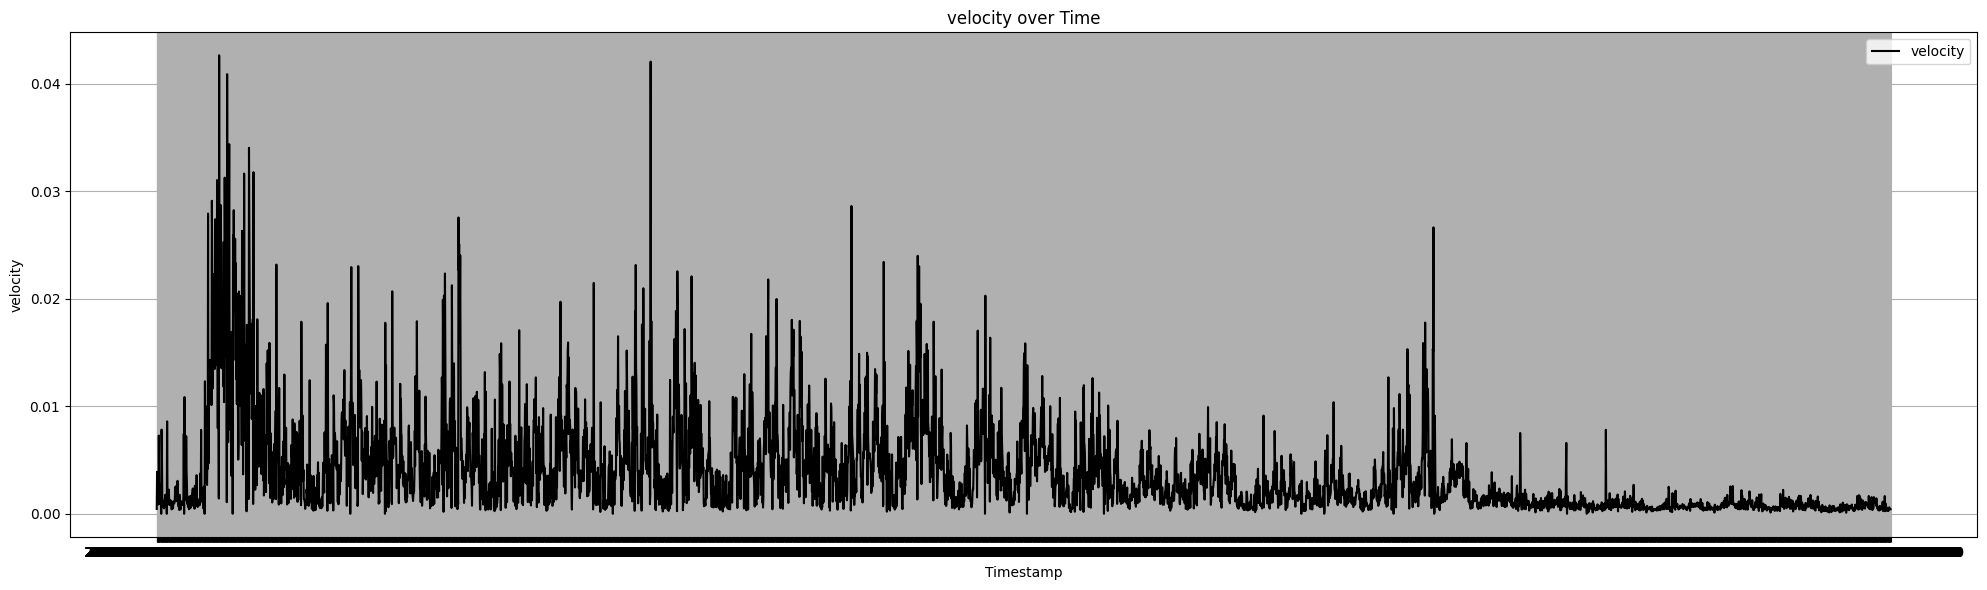

In [13]:
# Select all features except 'timestamp'
feature_cols = [col for col in df.columns if col != 'timestamp']

# Loop to display each feature one by one
for feature in feature_cols:
    plt.figure(figsize=(20, 6))
    plt.plot(df['timestamp'], df[feature], label=feature, color='black')
    plt.title(f'{feature} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(feature)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
